### **Ingeniería de Features, Modelos Avanzados e Interpretación de Modelos**
#### Consignas

**Proposito:**

Estudiar si es posible mejorar el desempaño de el/los modelos generados en el Sprint 1. Y a su vez obtener una visión más profunda del problema.

1. Elegir Funciones de transformación a utilizar: 
   1. Detección y eliminacion de Outliers
   2. Encoding
   3. Imputación de valores faltantes
   4. Escalado de Datos
   5. Generación de nuevas variables predictoras, reducción de dimensionalidad.
   6. **13 puntos**

2. Implementa las transformaciones elegidas, al menos 3. 
   1. **13 puntos**

3. Vuelve a entrenar el modelo implementado en el Sprint 1, el arbol de decisión, con el dataset transformado.
   1. Implementar el modelo con el nuevo dataset transformado. 
   2. Evaluar el desempeño 
   3. Comparar con desempeño en Sprint1.
   4. Explicar a que se deben las diferencias. 
   5. **8 puntos**

**Criterios de aceptación:**

Debes implementar al menos tres transformaciones de datos.

Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset. Ten en cuenta que, en el manejo de valores atípicos o en la imputación de valores faltantes, los valores obtenidos deben tener sentido. Por ejemplo, valores mayores que cero para superficies, número de baños, etc.

Debes reentrenar un modelo del Sprint Project 01 y comparar su desempeño con el modelo obtenido. Una aclaración: con reentrenar nos referimos a usar el mismo proceso de entrenamiento junto con sus hiperparámetros. Pero puede ocurrir - y, de hecho, se espera - que el dataset contenga más atributos que los utilizados en el Sprint Project 01.

----------------------------------------------------------

4. Modelos avanzados. 
   1. Elige dos modelos vistos durante el Sprint2. 
   2. Elegir Regresión Lineal con atributos polinómicos y regularización.
   3. Entrenar y evaluar modelos con argumentos por defecto.
   4. **21 puntos**

5. Modelos avanzados
    1. Optimiza los hiperparámetros mediante Validación Cruzada y Grid Search, o Random Search
    2. **13 puntos**

6. Modelos avanzados
   1. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la parte A.
   2. Cual aceptarías? por que?
   3. **13 puntos**

**Criterios de aceptación**

En los Modelos Avanzados debes hacer un train/test split y usar Validación Cruzada.

Al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando).

En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.

----------------------------------------------------------

7. Interpretación de modelos
   1. Que variables fueron relevantes para hacer el modelo para hacer predicciones?
   2. Cuales variables no fueron relevantes?
   3. En caso de Regresión Lineal con regularización, prestar atención a los parámetros (pendientes) obtenidos.
   4. En caso de Ensamble de Árboles, además de ver la importancia de cada atributo, también elige algunos arboles al azar y observa qué atributos considera importantes. 
      1. En que se diferencian estos arboles?
      2. Por que las diferencias?
      3. coincide con lo que esperabas a partir de tu experiencia con este dataset?
   5. **13 puntos**
8. Interpretación de los modelos
    1. Como es la distribución de los errores?
    2. Donde fallan los modelos?
    3. A que crees que se debe?
    4. **8 puntos**


**Criterios de aceptación**

Debes responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu sprint project!

Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?

----------------------------------------------------------

9. Cierre
   1.  Escribe las conclusiones a las que hayas llegado.

**Criterios de aceptación**

Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Ten en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas.

----------------------------------------------------------

### 1. Transformaciones 

Las funciones de transformación elegidas para este proyecto son:
1. Escalado de los datos: al tratarse de modelado multivariado, y como la consigna supone comprarar el mejor modelo del Sprint 1 con un nuevo modelo con datos transformados, se escalaran las variables numericas. A su vez, y para una mejor comparación, se utilizarán las mismas columnas utilizadas en el sprint01. Una vez realizado el escalado se procederá a la detección y eliminación de Outliers.

2. Detección y eliminación de outliers: en el sprint anterior hemos descubierto que exitian valores completamente atipicos en la distribución de los datos sobre todo en la variable de superficie cubierta, superficie total, y precio. Antiormente filtramos los datos usando cuartiles, sin embargo a la hora de realizar la modelación se aplico el filtro solicitado en las consignas. 1) Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2. 2) Selecciona aquellas propiedades cuya precio es menor 4000000 dólares. En este sprint se filtrarán los datos usando quintiles.
   
3. Encoding: La variable **Tipo de Propiedad** será procesada via Encoding ya que como quedó demostrado en el Sprint1 el precio de las propiedades esta fuertemente correlacionado con el tipo de propiedad.

#### 1.1 Librerías

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#### 1.2 Datasets

Se utilizará el mismo dataset del Sprint 1. 

In [154]:
propiedades = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")


In [155]:
propiedades.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta


Seleccionamos las columnas que se utilizarán en el análisis.
1) Latitud
2) Longitud
3) Rooms, o cantidad de ambientes
4) bedroons, o cantidad de dormitorios
5) bathrooms, o cantidas de baños
6) superficie total
7) superficie cubierta
8) precio
9) tipo de propiedad
10) barrio

In [156]:
#Columnas a utilizar
columnas = ["lat", 
            "lon", 
            "rooms", 
            "bedrooms", 
            "bathrooms", 
            "surface_total", 
            "surface_covered", 
            "price",
            "property_type",
            "l3"]

Criterio del Sprint01
En el sprint 1 se trabajó con el siguiente filtrado de los datos:

In [157]:
propiedades.loc[((propiedades["l2"]== "Capital Federal")&
                 (propiedades["property_type"].isin(["PH","Casa","Departamento"]))&
                 (propiedades["surface_total"].between(15,1000)) & (propiedades["price"]<= 4000000)),  columnas].dropna().reset_index(drop =True)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l3
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,San Cristobal
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Boedo
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo
4,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo
...,...,...,...,...,...,...,...,...,...,...
76766,-34.581308,-58.431236,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento,Palermo
76767,-34.585355,-58.427194,4.0,3.0,3.0,175.0,111.0,570000.0,PH,Palermo
76768,-34.585355,-58.427194,3.0,2.0,2.0,144.0,134.0,480000.0,PH,Palermo
76769,-34.584134,-58.436389,4.0,2.0,2.0,317.0,143.0,530000.0,PH,Palermo


El dataset de trabajo del SP1 consistió en 76771 entididades. Los criterios de seleeción fueron los establecidos por el docente.

El resultado de mi trabajo en el sprint 1 fue: 
1) Modelo: Arbol de decisión
2) Hp - Profundidad: 9
3) RMSE Train: 129685
4) RMSE Test: 154921

Estas son las metricas que se deberán mejorar con las nuevas herramientas aprendidas.

Para este sprint, inicialmente se decidió trabajar todas las instancias que se encuentren entre los cuantiles: 0.05 y 0.95. Es decir, con el 90% de los datos. 

Para ello se construyo una tabla de resumen estadistico como se muestra a continuación.

In [158]:
propiedades.describe(percentiles=[.05, .95])

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
5%,-34.801832,-58.715617,1.000000,1.000000,1.000000,35.000000,33.000000,6.750000e+04
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
95%,-34.426635,-58.314883,6.000000,4.000000,3.000000,473.000000,241.000000,6.200000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


En base a la tabla generada en el item anterior, se procedió a filtrar las filas que se encuentran entre estos rangos de datos. A su vez, se decidió trabajar con los tipos de propiedad más abundantes: PH, CASA y DEPARTAMENTO.

In [159]:
prop_2 = propiedades.loc[(propiedades['rooms'].between(1,6)) & 
                        (propiedades['bedrooms'].between(1,4)) & 
                        (propiedades['bathrooms'].between(1,3)) & 
                        (propiedades['surface_total'].between(35,473)) & 
                        (propiedades['surface_covered'].between(33,241)) & 
                        (propiedades['property_type'].isin(["PH","Casa","Departamento"]))&
                        (propiedades['price'].between(65000,620000)),
                        columnas].reset_index(drop=True)

In [160]:
prop_2

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l3
0,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Boedo
1,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo
2,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo
3,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo
4,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,PH,Villa Crespo
...,...,...,...,...,...,...,...,...,...,...
98080,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento,Berazategui
98081,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento,Pilar
98082,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento,Pilar
98083,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento,Pilar


##### 1.2.1 Agrupación de Barrios por precio por metro cuadrado
Como nueva variable a utilizar se seleccionaron los barrios y los precios por metro cuadrado de cada barrio. Es decir, que los clasifico o clusterizo en funcion de su precio por metro cuadrado. De esta manera se busco agrupar los barrios según esta caracteristica y así ayudar al modelo a predecir barrios caros y baratos. 

Se calculo la nueva variable, precio_2, que es el precio por metro cuadrado de cada instancia. Y se calculó la estadisctica descriptiva.

In [161]:
barrios_precio = prop_2.loc[: ,["surface_total","price", "l3"]]
barrios_precio["precio_2"] =  barrios_precio.price /  barrios_precio.surface_total
barrios_precio.dropna(inplace= True)
barrios_precio.describe(percentiles=[0.05, 0.1, 0.5, 0.9, 0.95])

,surface_total,price,precio_2
count,98085.000000,98085.000000,98085.000000
mean,95.351807,196712.068379,2383.172500
std,65.643707,105272.195959,975.997548
min,35.000000,65000.000000,144.444444
5%,40.000000,80000.000000,762.443363
10%,43.000000,92000.000000,1136.363636
50%,74.000000,168000.000000,2358.974359
90%,172.000000,345000.000000,3541.666667
95%,229.000000,419500.000000,4000.000000
max,473.000000,620000.000000,11090.909091


Para evitar Outliers en la clasificacion de barrios, se tomaron los precios_2 entre 1000 y 4000. Este rango representa el 85 % de todas las instancias.

In [162]:
barrios_precio = barrios_precio.loc[(barrios_precio.precio_2 > 1000) & (barrios_precio.precio_2 < 4000), :].reset_index(drop=True)
barrios_precio

,surface_total,price,l3,precio_2
0,70.0,159000.0,Boedo,2271.428571
1,45.0,125000.0,Palermo,2777.777778
2,85.0,295000.0,Palermo,3470.588235
3,56.0,150000.0,Villa Crespo,2678.571429
4,70.0,159500.0,Villa Crespo,2278.571429
...,...,...,...,...
85139,161.0,200000.0,Tres de Febrero,1242.236025
85140,54.0,165000.0,Berazategui,3055.555556
85141,50.0,73000.0,Pilar,1460.000000
85142,38.0,68000.0,Pilar,1789.473684


Inicialmente de calculo, el precio promedio del metro cuadrado y la desviacion estandar de esta variable.

In [163]:
barrios_precio.groupby(['l3'])['precio_2'].agg(['mean', np.std])

,mean,std
l3,,
Abasto,2434.384778,438.645432
Agronomía,2143.295990,518.264521
Almagro,2420.896257,481.703741
Almirante Brown,1706.429575,550.042618
Avellaneda,1715.148770,414.325830
...,...,...
Villa Riachuelo,1769.525585,477.591169
Villa Santa Rita,2053.327714,498.958666
Villa Soldati,1284.505784,228.164428


La primera clusterización se realizó usando KMEANS, los barrios y el precio por metro cuadrado.

In [164]:
from sklearn.cluster import KMeans

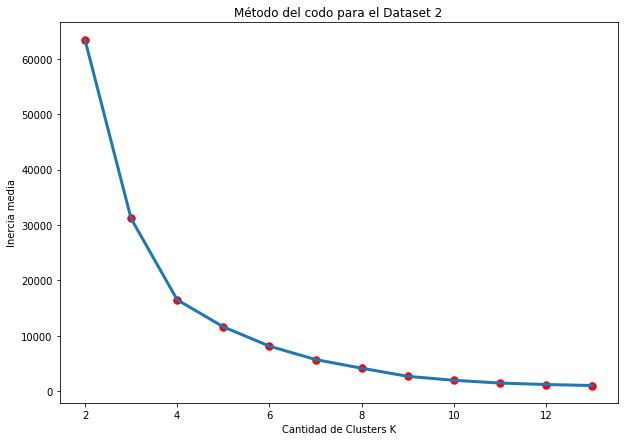

In [165]:
Sum_of_squared_distances = []
K = np.arange(2,14)
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(barrios_precio.groupby(['l3'])['precio_2'].agg(['mean']).values)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,barrios_precio.groupby(['l3'])['precio_2'].agg(['mean', np.std]).values.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 2')

plt.show()

De acuerdo al grafico anterior, el numero de cluster según KMEANS sería 4. Ademas de este metodo se probará una clusterización de Tipo Jerarquica.

In [166]:
import scipy.cluster.hierarchy as sch
#import dendrogram, linkage

In [167]:
etiqueta = barrios_precio.groupby(['l3']).agg(['mean']).index

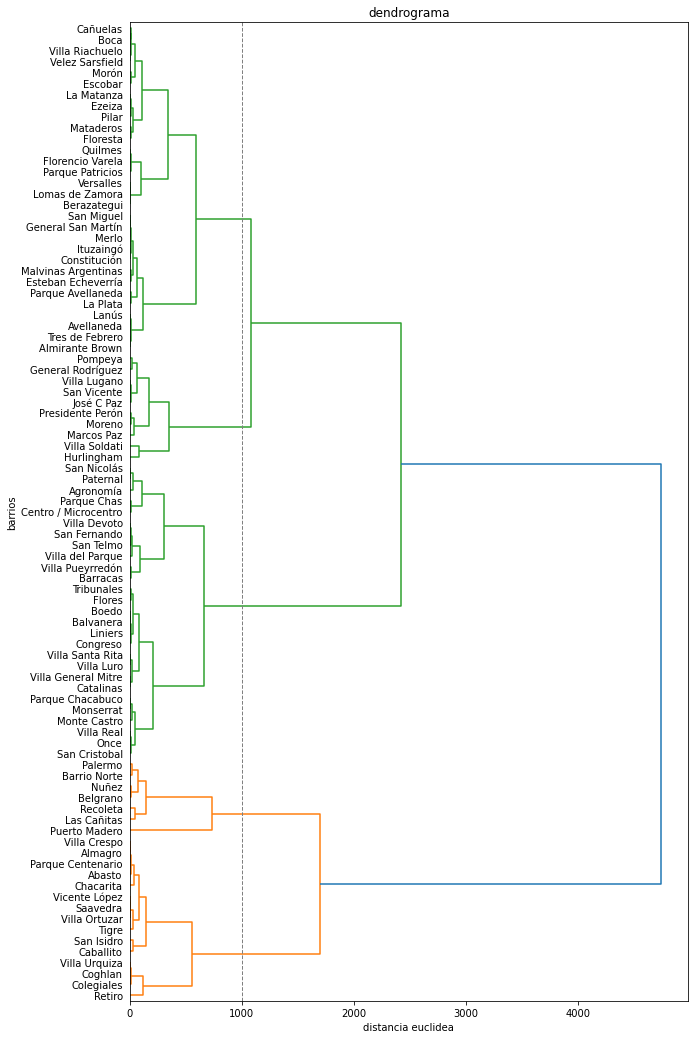

In [168]:
plt.figure(figsize=(10, 18))

dendrograma = sch.dendrogram(sch.linkage(barrios_precio.groupby(['l3'])['precio_2'].agg(['mean']).values,
                                        method='ward'),
                                        labels = etiqueta,
                                        orientation="right",
                                        leaf_font_size = 10
                                         )
                             
plt.axvline(x=1000, c='grey', lw=1, linestyle='dashed')
plt.title('dendrograma')
plt.ylabel("barrios")
plt.xlabel('distancia euclidea')
plt.show()

De acuerdo a la clusterizacion de tipo jerarquica, podrian resultar suficientes 5 clusters. Se puede ver la separación de los barrios mas caros, tales como: Puerto Madero, Palermo, Barrio Norte, Etc.

Para ejecutar este cluster, seria necesario el siguiente codigo. Sin embargo, se probará con otro metodo mas para evaluar cual obtiene los mejores resultados en la modelación.

In [169]:
from sklearn.cluster import AgglomerativeClustering

In [170]:
hc = AgglomerativeClustering(n_clusters=5, affinity= 'euclidean', linkage= 'ward')

hc.fit_predict(barrios_precio.groupby(['l3'])['precio_2'].agg(['median']).values)


array([1, 2, 1, 0, 0, 2, 1, 3, 3, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 3, 2, 3, 0, 1, 2, 2, 2, 2, 0, 0, 0, 4, 2, 3, 1, 1, 2, 2, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1,
       1])

Por ultimo se probo una clusterización manual basada en los quintiles de los precios por metro cuadrado de cada barrio, que fue la que mejor resultado obtuvo. 

In [171]:
barrios_categoria = barrios_precio.groupby(["l3"]).mean()[["precio_2"]].sort_values("precio_2", ascending= False).reset_index()

In [172]:
barrios_categoria

,l3,precio_2
0,Puerto Madero,3545.287097
1,Las Cañitas,3062.650959
2,Recoleta,3019.068264
3,Belgrano,2984.865005
4,Nuñez,2972.397639
...,...,...
84,San Vicente,1475.999753
85,Villa Lugano,1473.667590
86,José C Paz,1467.624118
87,Hurlingham,1371.285153


Se separaron los quintiles, 5 clusters. Esto basado en las cantidades de cluster definidas por los metodos anteriores.

In [173]:
barrios_precio["categoria"]  = pd.qcut(barrios_precio.precio_2, 5)

In [174]:
barrios_precio["categoria"].unique()

[(2208.333, 2571.429], (2571.429, 3010.753], (3010.753, 3999.983], (1804.348, 2208.333], (1002.923, 1804.348]]
Categories (5, interval[float64, right]): [(1002.923, 1804.348] < (1804.348, 2208.333] < (2208.333, 2571.429] < (2571.429, 3010.753] < (3010.753, 3999.983]]

In [175]:
barrios_categoria["categoria_barrios"] = pd.cut(barrios_categoria.precio_2, 
       bins=[1002.923, 1804, 2208, 2571, 3010, 4000],
       labels= ["Q1", "Q2","Q3","Q4","Q5"])

De esta manera quedaron definidos los 5 grupos de barrio según el precio por metro cuadrado.

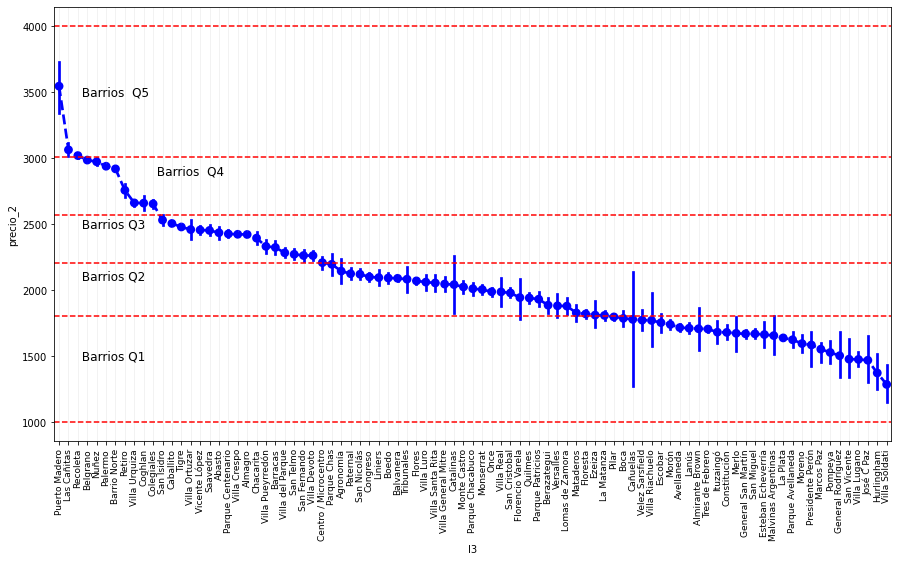

In [176]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x="l3", y="precio_2", 
                   data=barrios_precio, 
                   linestyles=["--"],
                   color = "blue",
                   order= barrios_precio.groupby(["l3"]).mean()[["precio_2"]].sort_values("precio_2", ascending= False).index)
plt.xticks(rotation=90, size=9)
plt.axhline(y= 1002, color = "r", linestyle= "--")
plt.axhline(y= 1804, color = "r", linestyle= "--")
plt.axhline(y= 2208 , color = "r", linestyle= "--")
plt.axhline(y= 2571, color = "r", linestyle= "--")
plt.axhline(y= 3010, color = "r", linestyle= "--")
plt.axhline(y= 3999, color = "r", linestyle= "--")
plt.text(2, 1500, ' Barrios Q1', size=12, ha='left', va='center')
plt.text(2, 2100, ' Barrios Q2', size=12, ha='left', va='center')
plt.text(2, 2500, ' Barrios Q3', size=12, ha='left', va='center')
plt.text(10, 2900, ' Barrios  Q4', size=12, ha='left', va='center')
plt.text(2, 3500, ' Barrios  Q5', size=12, ha='left', va='center')
plt.grid(axis="x", alpha=0.2)

In [177]:
barrios_categoria

,l3,precio_2,categoria_barrios
0,Puerto Madero,3545.287097,Q5
1,Las Cañitas,3062.650959,Q5
2,Recoleta,3019.068264,Q5
3,Belgrano,2984.865005,Q4
4,Nuñez,2972.397639,Q4
...,...,...,...
84,San Vicente,1475.999753,Q1
85,Villa Lugano,1473.667590,Q1
86,José C Paz,1467.624118,Q1
87,Hurlingham,1371.285153,Q1


### 1.3 Tratamiendo de los datos



Separamos las variables numéricas para tratarlas por separado.

In [178]:
X_num = prop_2.iloc[:,0:7]
X_num

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0
1,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0
2,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0
3,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0
4,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0
...,...,...,...,...,...,...,...
98080,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0
98081,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0
98082,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0
98083,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0


Separamos la variable objetivo, o dependiente.

In [179]:
y = prop_2.iloc[:, 7].reset_index(drop=True)
y

0        159000.0
1        125000.0
2        295000.0
3        150000.0
4        159500.0
           ...   
98080    165000.0
98081    130000.0
98082     73000.0
98083     68000.0
98084     98000.0
Name: price, Length: 98085, dtype: float64

##### 1.3.1 Escalado de Datos

Separamos el nombre de las columnas para incorporarlas luego del escalado.

In [180]:
col = X_num.columns
col

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered'],
      dtype='object')

In [181]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X_num)

In [182]:
 X = pd.DataFrame(X)
 X.columns = col

In [183]:
X

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,-0.327879,0.370745,-0.951654,-1.090530,0.91925,-0.386205,-0.468190
1,0.019963,0.250007,-0.951654,-1.090530,-0.70692,-0.767051,-0.814026
2,0.160016,0.177078,-0.951654,-1.090530,-0.70692,-0.157698,-0.681012
3,0.017566,0.141834,-0.951654,-1.090530,-0.70692,-0.599479,-0.521396
4,-0.064687,0.206097,-0.951654,-1.090530,-0.70692,-0.386205,-0.148957
...,...,...,...,...,...,...,...
98080,-2.521873,2.179383,-0.951654,-1.090530,-0.70692,-0.629946,-0.734218
98081,1.698441,-3.760533,1.051092,1.256035,0.91925,1.045775,0.383099
98082,1.719270,-4.104711,-1.953027,-1.090530,-0.70692,-0.690882,-1.080054
98083,1.717023,-4.106205,-0.951654,-1.090530,-0.70692,-0.873688,-1.000246


##### 1.3.2 Encoding Columna Tipo de Propiedad

Al dataset escalado, se le agrega las categorias de los barrios creadas, Q1, Q2, Q3, Q4, Q5. 

In [184]:
prop_2 = prop_2.merge(barrios_categoria, 
             how= "left",
             left_on="l3", 
             right_on="l3")
prop_2

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l3,precio_2,categoria_barrios
0,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Boedo,2091.188464,Q2
1,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo,2938.316494,Q4
2,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo,2938.316494,Q4
3,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo,2422.337174,Q3
4,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,PH,Villa Crespo,2422.337174,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...
98080,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento,Berazategui,1884.958734,Q2
98081,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento,Pilar,1796.109553,Q1
98082,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento,Pilar,1796.109553,Q1
98083,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento,Pilar,1796.109553,Q1


Dummies de las categorias:

In [185]:
pd.get_dummies(prop_2["categoria_barrios"]).reset_index(drop= True)

,Q1,Q2,Q3,Q4,Q5
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
98080,0,1,0,0,0
98081,1,0,0,0,0
98082,1,0,0,0,0
98083,1,0,0,0,0


##### 1.3.4 Union DataSet

Se unen las dummies de Tipo de Propiedad y Categorias de los barrios

In [186]:
X= pd.concat([X, pd.get_dummies(prop_2["property_type"]).reset_index(drop= True),
           pd.get_dummies(prop_2["categoria_barrios"]).reset_index(drop= True)], 
          axis= 1)

In [187]:
X

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,Q1,Q2,Q3,Q4,Q5
0,-0.327879,0.370745,-0.951654,-1.090530,0.91925,-0.386205,-0.468190,0,0,1,0,1,0,0,0
1,0.019963,0.250007,-0.951654,-1.090530,-0.70692,-0.767051,-0.814026,0,0,1,0,0,0,1,0
2,0.160016,0.177078,-0.951654,-1.090530,-0.70692,-0.157698,-0.681012,0,0,1,0,0,0,1,0
3,0.017566,0.141834,-0.951654,-1.090530,-0.70692,-0.599479,-0.521396,0,0,1,0,0,1,0,0
4,-0.064687,0.206097,-0.951654,-1.090530,-0.70692,-0.386205,-0.148957,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98080,-2.521873,2.179383,-0.951654,-1.090530,-0.70692,-0.629946,-0.734218,0,1,0,0,1,0,0,0
98081,1.698441,-3.760533,1.051092,1.256035,0.91925,1.045775,0.383099,0,1,0,1,0,0,0,0
98082,1.719270,-4.104711,-1.953027,-1.090530,-0.70692,-0.690882,-1.080054,0,1,0,1,0,0,0,0
98083,1.717023,-4.106205,-0.951654,-1.090530,-0.70692,-0.873688,-1.000246,0,1,0,1,0,0,0,0


Se completa el Dataset de la siguiente manera:

In [188]:
DataSet = pd.concat([X,y], axis=1).reset_index(drop= True)
DataSet

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,Q1,Q2,Q3,Q4,Q5,price
0,-0.327879,0.370745,-0.951654,-1.090530,0.91925,-0.386205,-0.468190,0,0,1,0,1,0,0,0,159000.0
1,0.019963,0.250007,-0.951654,-1.090530,-0.70692,-0.767051,-0.814026,0,0,1,0,0,0,1,0,125000.0
2,0.160016,0.177078,-0.951654,-1.090530,-0.70692,-0.157698,-0.681012,0,0,1,0,0,0,1,0,295000.0
3,0.017566,0.141834,-0.951654,-1.090530,-0.70692,-0.599479,-0.521396,0,0,1,0,0,1,0,0,150000.0
4,-0.064687,0.206097,-0.951654,-1.090530,-0.70692,-0.386205,-0.148957,0,0,1,0,0,1,0,0,159500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98080,-2.521873,2.179383,-0.951654,-1.090530,-0.70692,-0.629946,-0.734218,0,1,0,0,1,0,0,0,165000.0
98081,1.698441,-3.760533,1.051092,1.256035,0.91925,1.045775,0.383099,0,1,0,1,0,0,0,0,130000.0
98082,1.719270,-4.104711,-1.953027,-1.090530,-0.70692,-0.690882,-1.080054,0,1,0,1,0,0,0,0,73000.0
98083,1.717023,-4.106205,-0.951654,-1.090530,-0.70692,-0.873688,-1.000246,0,1,0,1,0,0,0,0,68000.0


##### 1.3.5 Eliminación de NA's

El dataset posee 6436 NAs en las columnas de latitud y longitud. Se eliminarán para el analisis.

In [189]:
DataSet.isnull().sum().sort_values(ascending= False)

lat                6436
lon                6436
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
Casa                  0
Departamento          0
PH                    0
Q1                    0
Q2                    0
Q3                    0
Q4                    0
Q5                    0
price                 0
dtype: int64

In [190]:
DataSet.dropna(inplace= True)

In [191]:
DataSet.reset_index(drop=True, inplace=True)
DataSet

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,Q1,Q2,Q3,Q4,Q5,price
0,-0.327879,0.370745,-0.951654,-1.090530,0.91925,-0.386205,-0.468190,0,0,1,0,1,0,0,0,159000.0
1,0.019963,0.250007,-0.951654,-1.090530,-0.70692,-0.767051,-0.814026,0,0,1,0,0,0,1,0,125000.0
2,0.160016,0.177078,-0.951654,-1.090530,-0.70692,-0.157698,-0.681012,0,0,1,0,0,0,1,0,295000.0
3,0.017566,0.141834,-0.951654,-1.090530,-0.70692,-0.599479,-0.521396,0,0,1,0,0,1,0,0,150000.0
4,-0.064687,0.206097,-0.951654,-1.090530,-0.70692,-0.386205,-0.148957,0,0,1,0,0,1,0,0,159500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91644,-2.521873,2.179383,-0.951654,-1.090530,-0.70692,-0.629946,-0.734218,0,1,0,0,1,0,0,0,165000.0
91645,1.698441,-3.760533,1.051092,1.256035,0.91925,1.045775,0.383099,0,1,0,1,0,0,0,0,130000.0
91646,1.719270,-4.104711,-1.953027,-1.090530,-0.70692,-0.690882,-1.080054,0,1,0,1,0,0,0,0,73000.0
91647,1.717023,-4.106205,-0.951654,-1.090530,-0.70692,-0.873688,-1.000246,0,1,0,1,0,0,0,0,68000.0


##### 1.3.6 Eliminación de Outliers

A pesar de haber realizado un tratamiento de datos en los apartados anteriores, luego del escalado observamos que aún existen datos menores a -3 y mayores a 3, es decir 3 veces la SD. 
Se eliminaran esos datos para facilitar el analisis. 

In [192]:
DataSet.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,Q1,Q2,Q3,Q4,Q5,price
count,9.164900e+04,9.164900e+04,91649.000000,91649.000000,91649.000000,91649.000000,91649.000000,91649.000000,91649.000000,91649.000000,91649.000000,91649.000000,91649.000000,91649.000000,91649.000000,91649.000000
mean,-4.140156e-14,-2.484516e-14,0.004211,0.003291,-0.021615,-0.004227,-0.002601,0.086886,0.784329,0.128785,0.152822,0.190564,0.365219,0.240450,0.050944,194467.683706
std,1.000005e+00,1.000005e+00,1.001219,1.002195,0.987359,1.002283,1.005045,0.281669,0.411289,0.334963,0.359818,0.392748,0.481494,0.427359,0.219885,104205.570880
min,-5.995311e+00,-4.503567e+00,-1.953027,-1.090530,-0.706920,-0.919389,-1.133260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65000.000000
25%,-2.556285e-01,-2.696575e-01,-0.951654,-1.090530,-0.706920,-0.645180,-0.734218,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120000.000000
50%,-2.984368e-02,1.276677e-01,0.049719,0.082752,-0.706920,-0.325270,-0.281971,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,165000.000000
75%,2.599300e-01,3.601613e-01,1.051092,1.256035,0.919250,0.223148,0.409702,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,240000.000000
max,3.536775e+00,5.135261e+00,3.053838,2.429317,2.545419,5.753029,4.400120,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,620000.000000


In [193]:
DataSet.columns

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'Casa', 'Departamento', 'PH', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'price'],
      dtype='object')

In [194]:
DataSet_S_Outliers = DataSet[~((DataSet.loc[:,['lat','lon',  'rooms','bedrooms','bathrooms','surface_total','surface_covered']] < -3) | (DataSet.loc[:,['lat','lon','rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']] > 3 )).any(axis=1)    ]
DataSet_S_Outliers.reset_index(drop=True,inplace= True)
DataSet_S_Outliers

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,Q1,Q2,Q3,Q4,Q5,price
0,-0.327879,0.370745,-0.951654,-1.090530,0.91925,-0.386205,-0.468190,0,0,1,0,1,0,0,0,159000.0
1,0.019963,0.250007,-0.951654,-1.090530,-0.70692,-0.767051,-0.814026,0,0,1,0,0,0,1,0,125000.0
2,0.160016,0.177078,-0.951654,-1.090530,-0.70692,-0.157698,-0.681012,0,0,1,0,0,0,1,0,295000.0
3,0.017566,0.141834,-0.951654,-1.090530,-0.70692,-0.599479,-0.521396,0,0,1,0,0,1,0,0,150000.0
4,-0.064687,0.206097,-0.951654,-1.090530,-0.70692,-0.386205,-0.148957,0,0,1,0,0,1,0,0,159500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83866,1.848225,-2.659742,-1.953027,-1.090530,-0.70692,-0.645180,-0.601204,0,1,0,1,0,0,0,0,118380.0
83867,0.149360,-0.636806,-0.951654,-1.090530,-0.70692,-0.873688,-1.000246,0,1,0,1,0,0,0,0,70000.0
83868,-0.211411,-0.657518,-0.951654,-1.090530,-0.70692,-0.767051,-0.814026,0,0,1,1,0,0,0,0,110000.0
83869,-0.080668,-1.035540,0.049719,0.082752,0.91925,1.000073,0.117071,0,1,0,1,0,0,0,0,200000.0


### 2 Modelado - 

#### 2.1 Entrenar modelo de Arbol de Decisión con Datos Transformados

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error

Definimos una función para evaluar el modelo a partir del RMSE y R2 aj.

In [327]:
#Definimos una funcion que logra evaluar el desempeño de los modelos.

def model_ev(X_train, X_test, y_train, y_test, model):
  #tabla_errores = []
  global tabla_errores, rmse_train, rmse_test, r_squared_tra, adjusted_r_squared_tra, r_squared_te, adjusted_r_squared_te, y_test_pred,y_train_pred
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train) 
  y_test_pred = model.predict(X_test)

  
  # Calculo de RMSE 
  rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
  print(f'RMSE Train: {rmse_train}\n')
  print(f'RMSE Test: {rmse_test}\n')
  
  # Calculo de mae 
  mae_train = mean_absolute_error(y_train,y_train_pred)
  mae_test = mean_absolute_error(y_test, y_test_pred)
  print(f'MAE Train: {mae_train}\n')
  print(f'MAE Test: {mae_test}\n')

  # Calculo de R cuadrado y R cuadrado ajustado del conjunto TRAIN
  SS_Residual_a = sum((y_train - y_train_pred)**2)       
  SS_Total_a = sum((y_train-np.mean(y_train))**2)     
  r_squared_tra = 1 - (float(SS_Residual_a))/SS_Total_a
  adjusted_r_squared_tra = 1 - (1-r_squared_tra)*(len(y)-1)/(len(y)-X.shape[1]-1)
  print(f"R^2(train)= {r_squared_tra}")
  print(f"R^2_ajt(train)= {adjusted_r_squared_tra}\n")
  
  # Calculo de R cuadrado y R cuadrado ajustado del conjunto TEST
  SS_Residual_b = sum((y_test - y_test_pred)**2)       
  SS_Total_b = sum((y_test-np.mean(y_test))**2)     
  r_squared_te = 1 - (float(SS_Residual_b))/SS_Total_b
  adjusted_r_squared_te = 1 - (1-r_squared_te)*(len(y)-1)/(len(y)-X.shape[1]-1)
  print(f"R^2(test)= {r_squared_te}") 
  print(f"R^2_ajt(test)= {adjusted_r_squared_te}\n")
  
  #Histograma de los errores (y - y_predicho) para cada conjunto:
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)
  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
  sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
  plt.xlabel('errores')
  plt.legend()

  #Scatter de y vs y-predicho para lo testeado:
  ax = plt.subplot(1,2,2)
  ax.scatter(y_test,y_test_pred, s =2)
  
  tabla_errores = pd.concat([
    pd.DataFrame({
      'model': str(model),
      'Tipo_error': "Entrenamiento",
      'RMSE':  np.sqrt(mean_squared_error(y_train,y_train_pred)),
      'Error': y_train - y_train_pred,
      'precio': y_train
    }), 
    pd.DataFrame({
      'model': str(model),
      'Tipo_error': "Test",
      'RMSE':  np.sqrt(mean_squared_error(y_test, y_test_pred)),
      'Error': y_test - y_test_pred,
      'precio': y_test
    })
  ])
  
  tabla_errores['cat_precio'] = pd.qcut(tabla_errores.precio, 5)
  
  
   #boxplot de los errores (y - y_predicho) para cada conjunto:
  plt.figure(figsize = (5,10))
  plt.subplot(2,1,1)
  
  sns.boxplot(data= tabla_errores,
              x= 'Tipo_error',
              y= 'Error')
  
  
  
  
  plt.legend()
      
  lims = [
      np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
      np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
      ]
      
  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
  plt.xlabel('y (test)')
  plt.ylabel('y_pred (test)')
  plt.tight_layout()
  plt.show()
  
  plt.figure(figsize=(20,8))
  g = sns.FacetGrid(tabla_errores, col="cat_precio", height=3.5, aspect=2, col_wrap=2)
  g.map_dataframe(sns.histplot, x="Error", hue= 'cat_precio')
  
  plt.figure(figsize=(20,8))
  sns.boxplot(data= tabla_errores,
            y= 'cat_precio',
            x= 'Error')
  
  

In [197]:
def eval_model_CV (model, descr, X_, y_, folds): 
    resultado = cross_validate(model,
                               X_,
                               y_, 
                               cv=folds, 
                               scoring = 'neg_root_mean_squared_error',
                               return_train_score= True 
                               ) 
    rmse_test = np.mean(resultado['test_score']*-1)
    rmse_train = np.mean(resultado['train_score']*-1)
    return print('RMSE TEST: ',rmse_test, 'RMSE TRAIN: ', rmse_train)

In [198]:
X = DataSet_S_Outliers.drop(columns=['price'])
y = DataSet_S_Outliers['price']

In [199]:
X

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,Q1,Q2,Q3,Q4,Q5
0,-0.327879,0.370745,-0.951654,-1.090530,0.91925,-0.386205,-0.468190,0,0,1,0,1,0,0,0
1,0.019963,0.250007,-0.951654,-1.090530,-0.70692,-0.767051,-0.814026,0,0,1,0,0,0,1,0
2,0.160016,0.177078,-0.951654,-1.090530,-0.70692,-0.157698,-0.681012,0,0,1,0,0,0,1,0
3,0.017566,0.141834,-0.951654,-1.090530,-0.70692,-0.599479,-0.521396,0,0,1,0,0,1,0,0
4,-0.064687,0.206097,-0.951654,-1.090530,-0.70692,-0.386205,-0.148957,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83866,1.848225,-2.659742,-1.953027,-1.090530,-0.70692,-0.645180,-0.601204,0,1,0,1,0,0,0,0
83867,0.149360,-0.636806,-0.951654,-1.090530,-0.70692,-0.873688,-1.000246,0,1,0,1,0,0,0,0
83868,-0.211411,-0.657518,-0.951654,-1.090530,-0.70692,-0.767051,-0.814026,0,0,1,1,0,0,0,0
83869,-0.080668,-1.035540,0.049719,0.082752,0.91925,1.000073,0.117071,0,1,0,1,0,0,0,0


In [200]:
y

0        159000.0
1        125000.0
2        295000.0
3        150000.0
4        159500.0
           ...   
83866    118380.0
83867     70000.0
83868    110000.0
83869    200000.0
83870    165000.0
Name: price, Length: 83871, dtype: float64

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Se procede a la optimización de hiperparametros tal cual se hizo en el Sprint 1 para que puedan ser comparados los resultados.

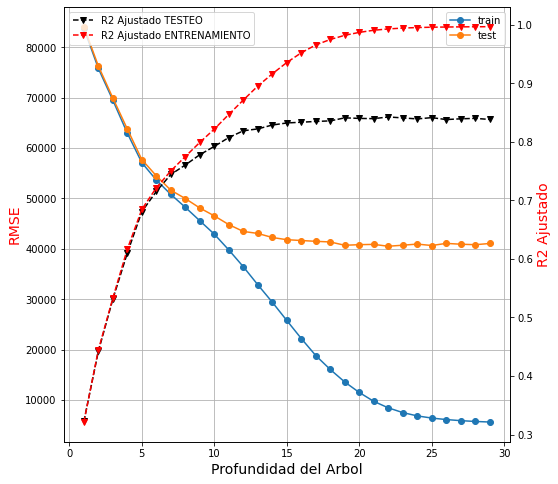

In [202]:
lista_rmse_train = []
lista_rmse_test = []

lista_r2aj_test = []
lista_r2aj_train = []

max_depths = np.arange(1,30,1)

for k in max_depths:
    model =DecisionTreeRegressor(max_depth= k) 
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

    yhat = model.predict(X_test)
    SS_Residual = sum((y_test-yhat)**2)       
    SS_Total = sum((y_test-np.mean(y_test))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    lista_r2aj_test.append(adjusted_r_squared)


    yhat = model.predict(X_train)
    SS_Residual = sum((y_train-yhat)**2)       
    SS_Total = sum((y_train-np.mean(y_train))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    lista_r2aj_train.append(adjusted_r_squared)

# create figure and axis objects with subplots()

fig,ax = plt.subplots()
# make a plot
ax.plot(max_depths, lista_rmse_train,'o-',label='train' )
ax.plot(max_depths, lista_rmse_test,'o-',label='test')
# set x-axis label
ax.set_xlabel("Profundidad del Arbol",fontsize=14)
# set y-axis label
ax.set_ylabel("RMSE",color="red",fontsize=14)
ax.grid(True)
ax.legend()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(max_depths, lista_r2aj_test,'v--k', label='R2 Ajustado TESTEO')
ax2.plot(max_depths, lista_r2aj_train,'v--r', label='R2 Ajustado ENTRENAMIENTO')
# set x-axis label
ax2.set_ylabel("R2 Ajustado",color="red",fontsize=14)
ax2.legend()
fig.set_size_inches(8, 8)
plt.show()

Se observa una buena optimización de la profundidad del arbol con una profundidad de 9. Se usara esta profundidad para correr el modelo y compararlo con el del Sprint1.

In [203]:
tree = DecisionTreeRegressor(max_depth= 9)

RMSE Train: 45570.40700572116

RMSE Test: 48080.66867232955

MAE Train: 31365.199827166274

MAE Test: 32653.70328326513

R^2(train)= 0.7992675530293246
R^2_ajt(train)= 0.7992316459670795

R^2(test)= 0.7785245873259734
R^2_ajt(test)= 0.7784849697576697



/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


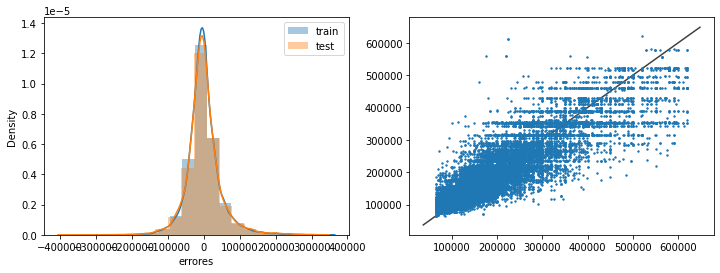

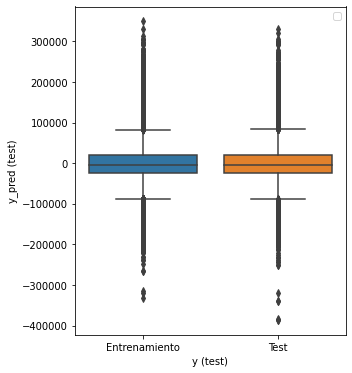

<Figure size 1440x576 with 0 Axes>

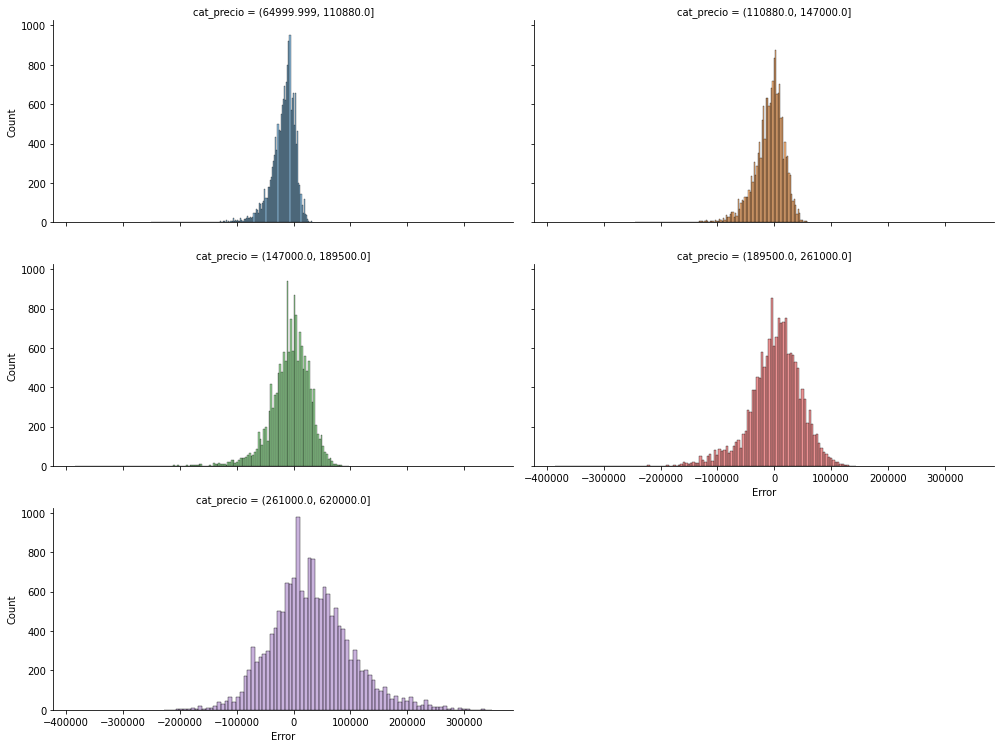

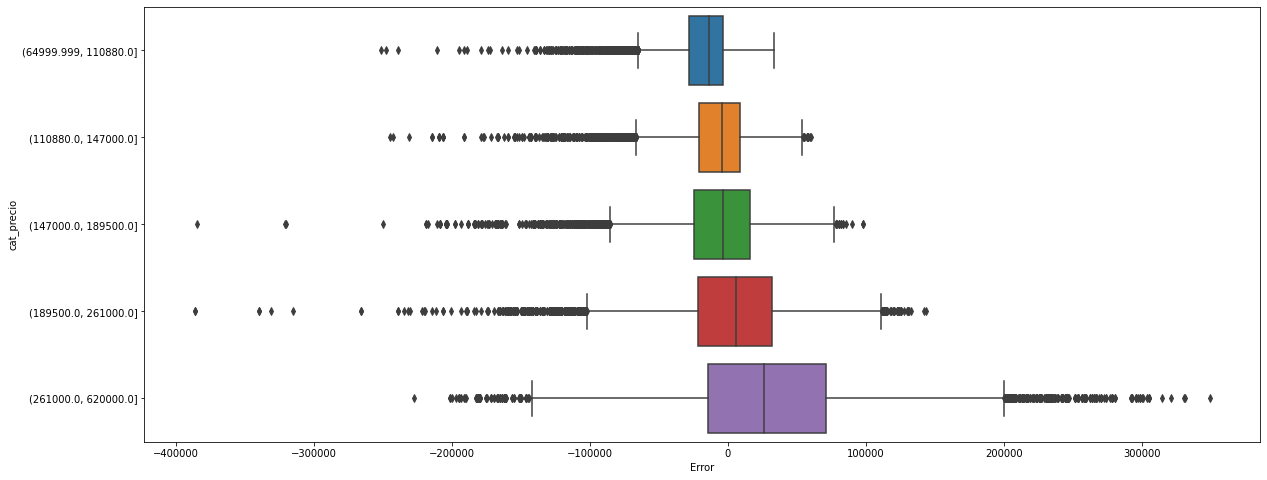

In [328]:
model_ev(X_train,X_test,y_train,y_test, tree)

In [323]:
tabla_errores['cat_precio'] = pd.qcut(tabla_errores.precio, 5)
tabla_errores

,model,Tipo_error,RMSE,Error,precio,cat_precio
23970,"RandomForestRegressor(max_depth=10, max_featur...",Entrenamiento,39551.937219,19567.049159,120000.0,"(110880.0, 147000.0]"
2805,"RandomForestRegressor(max_depth=10, max_featur...",Entrenamiento,39551.937219,80064.324033,208000.0,"(189500.0, 261000.0]"
49622,"RandomForestRegressor(max_depth=10, max_featur...",Entrenamiento,39551.937219,855.421199,91000.0,"(64999.999, 110880.0]"
26676,"RandomForestRegressor(max_depth=10, max_featur...",Entrenamiento,39551.937219,-41675.876582,149000.0,"(147000.0, 189500.0]"
19081,"RandomForestRegressor(max_depth=10, max_featur...",Entrenamiento,39551.937219,-20403.060364,109000.0,"(64999.999, 110880.0]"
...,...,...,...,...,...,...
71945,"RandomForestRegressor(max_depth=10, max_featur...",Test,42348.411021,-10451.632243,180000.0,"(147000.0, 189500.0]"
11407,"RandomForestRegressor(max_depth=10, max_featur...",Test,42348.411021,15733.048420,170000.0,"(147000.0, 189500.0]"
33789,"RandomForestRegressor(max_depth=10, max_featur...",Test,42348.411021,1994.780327,129000.0,"(110880.0, 147000.0]"
25145,"RandomForestRegressor(max_depth=10, max_featur...",Test,42348.411021,4962.616061,213750.0,"(189500.0, 261000.0]"


<AxesSubplot:xlabel='Error', ylabel='Count'>

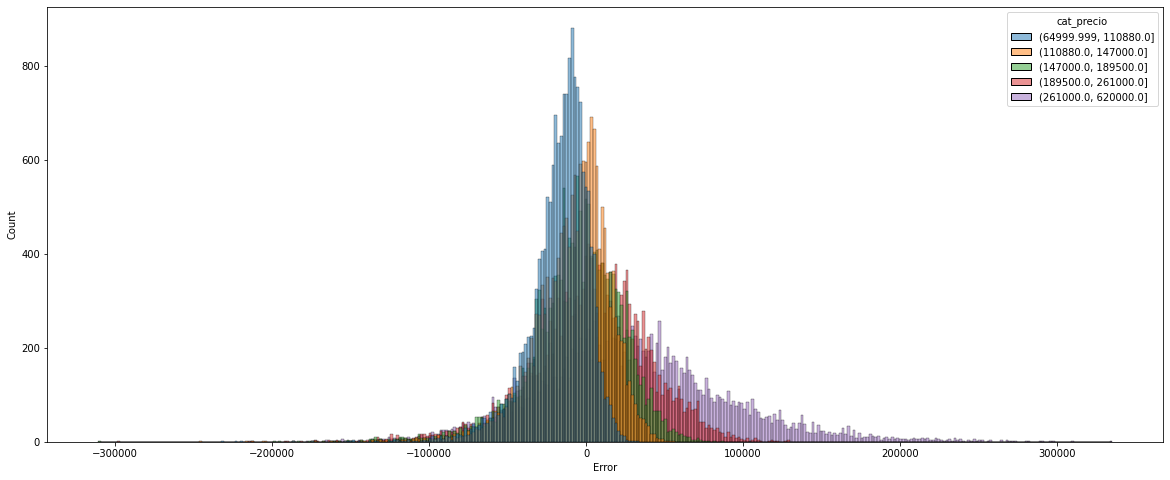

In [324]:
plt.figure(figsize=(20,8))
sns.histplot(data=tabla_errores, x= 'Error', hue= 'cat_precio')

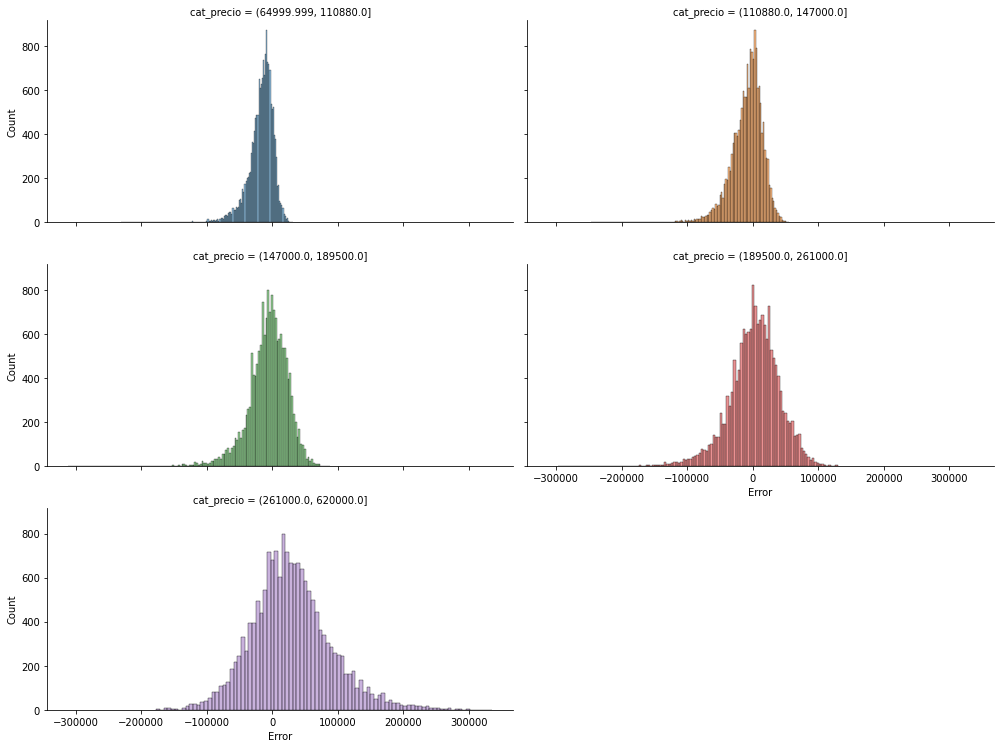

In [325]:
g = sns.FacetGrid(tabla_errores, col="cat_precio", height=3.5, aspect=2, col_wrap=2)
g.map_dataframe(sns.histplot, x="Error", hue= 'cat_precio')

<AxesSubplot:xlabel='Error', ylabel='cat_precio'>

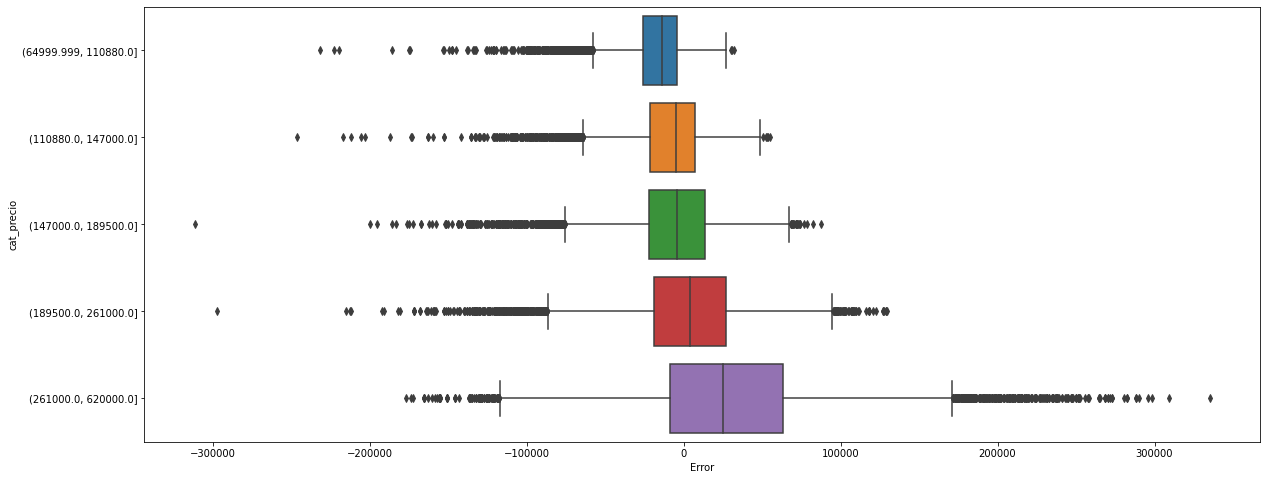

In [326]:
plt.figure(figsize=(20,8))
sns.boxplot(data= tabla_errores,
            y= 'cat_precio',
            x= 'Error')

El resultado de mi trabajo en el sprint 1 fue: 
1) Modelo: Arbol de decisión
2) Hp - Profundidad: 9
3) RMSE Train: 129685
4) RMSE Test: 154921

El resultado del modelado con los pretratamientos de los datos fue: 
1) Modelo. Arbol de decisión
2) Hp - Profundidad: 9
3) RMSE Train: 45570
4) RMSE Test: 47931

**Claramente se puede observar una contundente mejora del modelado con las tecnicas de pretratamiento de los datos.**

La mejora del modelado usando las tecnicas due del orden del: 70% en los datos de TEST.

Se calcularon las importancias del modelo para ver como afectan las variables seleccionadas. Se puede observar que las variables de categoria de barrio si contribuyeron al modelo.

In [205]:
pd.DataFrame({
    "Variables": X.columns,
    "importancias": tree.feature_importances_}).sort_values("importancias", ascending= False)

,Variables,importancias
6,surface_covered,0.490584
0,lat,0.162059
5,surface_total,0.095393
1,lon,0.051666
8,Departamento,0.048183
10,Q1,0.036503
14,Q5,0.029881
4,bathrooms,0.027213
12,Q3,0.027013
13,Q4,0.023076


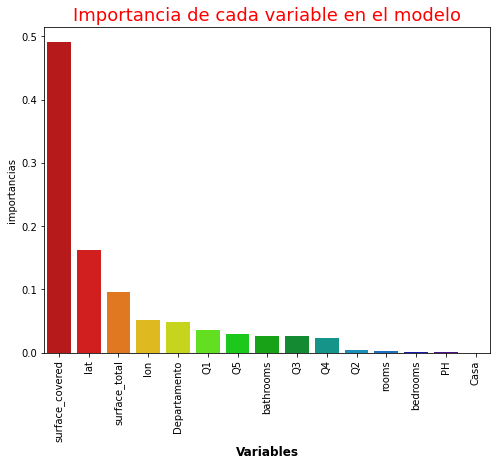

In [206]:
plt.figure(figsize = (8, 6))
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": tree.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= "nipy_spectral_r")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

##### 2.1.1 Evaluacion por Validación cruzada 

Para conocer mejor el desempeño del nuevo modelo se hará uso de la evaluación por CrossValidation que posee SKLEARN.

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
import  sklearn.metrics 
from sklearn.model_selection import cross_val_score

In [61]:
tree = DecisionTreeRegressor(max_depth= 9)

In [62]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

La metrica utilizada sigue siendo el RMSE, pero esta metrica no esta disponible con este metodo. Si se encuentra atraves del neg_mean_squared_error. Para obtener el RMSE a esta metrica hay que pasarla a valores positivos y luego sacarle la raiz cuadrada.

In [63]:
tree_scores = cross_val_score(tree, X, y, cv=5,scoring="neg_root_mean_squared_error")


El error promedio con validación cruzada fue muy similar al error obtenido sin CV (del orden de los 47K)

In [64]:
cross_val_score(tree, X, y, cv=5,scoring="neg_root_mean_squared_error")

array([-46589.68185565, -47774.93121099, -47222.67717379, -47706.90730232,
       -49491.73129196])

In [65]:
((tree_scores*-1)).mean()

47761.35365704404

Para conocer un poco mas el desempeño del modelo con distintas profundidades (optimización) se calcularon las metricas promedio usando CV.

In [66]:
from sklearn.model_selection import cross_validate

In [67]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    clf = DecisionTreeRegressor(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, 
                                 return_train_score=True, 
                                 n_jobs = -1, 
                                 scoring="neg_root_mean_squared_error")
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = (np.array(tree_train_scores_mean)*-1)
tree_train_scores_std = (np.array(tree_train_scores_std))
tree_test_scores_mean = (np.array(tree_test_scores_mean)*-1)
tree_test_scores_std = (np.array(tree_test_scores_std))

En el siguiente grafico se puede ver la optimización mediante CV usando solo la profundidad del arbol de decisión. 
Se corrobora que una profundidad de 9-10 es suficiente para equilibrar varianza y sesgo del modelo.

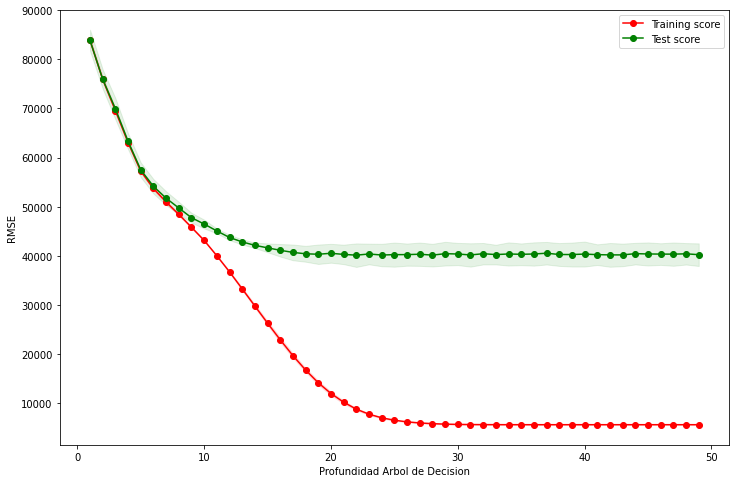

In [68]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

**Criterios de aceptación:**

Debes implementar al menos tres transformaciones de datos.

Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset. Ten en cuenta que, en el manejo de valores atípicos o en la imputación de valores faltantes, los valores obtenidos deben tener sentido. Por ejemplo, valores mayores que cero para superficies, número de baños, etc.

Debes reentrenar un modelo del Sprint Project 01 y comparar su desempeño con el modelo obtenido. Una aclaración: con reentrenar nos referimos a usar el mismo proceso de entrenamiento junto con sus hiperparámetros. Pero puede ocurrir - y, de hecho, se espera - que el dataset contenga más atributos que los utilizados en el Sprint Project 01.

**Se cumplieron la totalidad de los items solicitados, sumando algunos extra para un mejor entendimiento de lo estudiado en el sprint 1.**

**Requerimientos adicionales**

1) Aplica tecnica de clustering en el data set. Resuelto con el cluster de barrios por precios por metro cuadrado.
2) Implementa una transformacion distinta. Resuelto con la transformación de barrios, a categorias de barrio por precio por metro cuadrado. 

### 3 Modelos Avanzados
1. Modelos avanzados. 
   1. Elige dos modelos vistos durante el Sprint2. 
   **Los modelos elegidos serán XGBoost y RandomForest**
   2. Elegir Regresión Lineal con atributos polinómicos y regularización.
   3. Entrenar y evaluar modelos con argumentos por defecto.
   4. **21 puntos**

**Criterios de aceptación**

En los Modelos Avanzados debes hacer un train/test split y usar Validación Cruzada.

Al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando).

En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.

#### 2.1.2.1 Modelos Elegidos
Los modelos avanzados elegidos serán: 
1) Regresion lineal y regularizaciones
2) RandomForest
2) GradientBoostRegressor

#### 2.2 Regresion Lineal - Atributos Polinomicos

In [69]:
from sklearn.preprocessing import PolynomialFeatures

Conformamos, las variables trabajadas anteriormente como X e y.

In [70]:
X.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,Q1,Q2,Q3,Q4,Q5
0,-0.327879,0.370745,-0.951654,-1.09053,0.91925,-0.386205,-0.468190,0,0,1,0,1,0,0,0
1,0.019963,0.250007,-0.951654,-1.09053,-0.70692,-0.767051,-0.814026,0,0,1,0,0,0,1,0
2,0.160016,0.177078,-0.951654,-1.09053,-0.70692,-0.157698,-0.681012,0,0,1,0,0,0,1,0
3,0.017566,0.141834,-0.951654,-1.09053,-0.70692,-0.599479,-0.521396,0,0,1,0,0,1,0,0
4,-0.064687,0.206097,-0.951654,-1.09053,-0.70692,-0.386205,-0.148957,0,0,1,0,0,1,0,0


In [71]:
y.head()

0    159000.0
1    125000.0
2    295000.0
3    150000.0
4    159500.0
Name: price, dtype: float64

Separación de datos de entrenamiento y prueba a ejecutar en todos los modelos.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :], y, test_size=0.25, random_state=42)

Se crean atributos polinomicos de grado 3, resultando en un total de 815 Columnas.
A su vez, se corroboran las dimensiones de las matrices de X e y en Train y Test.

In [336]:
poly = PolynomialFeatures(3, include_bias=False, interaction_only= False, order= 'C')
X_train_new = poly.fit_transform(X_train.values)
X_test_new = poly.fit_transform(X_test.values)
print(X_train_new.shape, X_test_new.shape)
print(X_train.shape, X_test.shape)

(58709, 815) (25162, 815)
(58709, 15) (25162, 15)


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Se aplico la regresión lineal sin reguralización conlos atributos polinomicos, luego se regularizó por Ridge y Lasso y se revisaron los coeficientes. La evaluación se hizo con el X_Test.

In [337]:
modelLinear = LinearRegression().fit(X_train_new, y_train)
y_predict_linear =  modelLinear.predict(X_test_new)

modelLasso = Lasso(alpha=0.1).fit(X_train_new, y_train)
y_predict_lasso = modelLasso.predict(X_test_new)

modelRidge = Ridge(alpha=0.1).fit(X_train_new, y_train)
y_predict_ridge = modelRidge.predict(X_test_new)

linear_loss = np.sqrt(mean_squared_error(y_test, y_predict_linear))
print("Linear Loss:", linear_loss)

lasso_loss = np.sqrt(mean_squared_error(y_test, y_predict_lasso))
print("Lasso Loss: ", lasso_loss)

ridge_loss = np.sqrt(mean_squared_error(y_test, y_predict_ridge))
print("Ridge Loss: ", ridge_loss)



/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62399814544942.055, tolerance: 60736941578.11674
  model = cd_fast.enet_coordinate_descent(


Linear Loss: 47399.92035282481
Lasso Loss:  47438.554827012915
Ridge Loss:  47405.3513140637


In [76]:
print("="*32)
print("Coef LASSO")
print(modelLasso.coef_)


Coef LASSO
[ 1.53925847e+04  2.25210910e+04  4.51291185e+04  1.16078608e+03
  2.88991605e+04  1.51542978e+04  8.11438046e+03 -7.18495948e+04
  3.69841652e+04 -1.22515547e+04 -3.83594843e+04 -4.66028428e+04
 -2.93652493e+04  1.21829951e+04  4.37809229e+04  9.60967708e+03
  1.63697096e+04  2.27499180e+03 -2.80265608e+03 -4.93682310e+03
  1.42436043e+04  2.13934415e+03 -6.15476863e+03  5.56188811e+03
  5.98676813e+03  1.45558385e+04  6.11833199e+03 -8.71784935e+03
  6.17775662e+03  1.68074002e+05  5.96664116e+03  1.44342640e+03
 -3.19308522e+03  1.56361854e+03  1.41950619e+04  1.94149026e+02
 -2.19487701e+04 -6.91625837e+03 -0.00000000e+00  9.02027890e+03
 -1.09567845e+04 -1.21074873e+04  2.44246890e+04  5.04161721e+03
  1.04311029e+03  6.91381399e+02  3.15673803e+03  1.04928014e+04
 -2.64808123e+03 -1.56588718e+04 -1.86915340e+04 -2.89364231e+04
 -8.60093123e+03 -8.84351267e+03 -4.44284554e+03  1.47901731e+04
  6.33466440e+03 -3.72258712e+03 -1.32679044e+03  2.24062923e+03
  4.14855883e+

In [77]:
print("="*32)
print("Coef RIDGE")
print(modelRidge.coef_)

Coef RIDGE
[ 1.48899952e+04 -4.91831604e+04  2.67221187e+03  4.81902280e+03
  6.27381597e+03  2.76729260e+04  8.23599380e+03 -4.82670974e+03
  8.50522764e+03 -3.67851792e+03 -2.03800380e+04 -4.78277533e+03
 -5.77399182e+02  1.31465625e+04  1.25936498e+04  3.32701582e+04
  9.49326129e+04  6.98493511e+03 -4.78494268e+03  3.18151709e+03
  4.36333433e+04  8.19392746e+01 -2.91616699e+03  1.73211253e+04
  4.85036913e+02 -1.26574211e+04  1.28735760e+04 -3.89404831e+03
 -3.57239624e+04  5.42918511e+04  1.25589034e+05 -3.63942122e+03
 -1.11985793e+04  1.12502602e+03  1.78570130e+04  2.80787485e+04
 -2.22112203e+04 -1.97596576e+04 -7.21228250e+03  3.75436893e+04
  2.79730008e+04  4.09248845e+04 -4.34473280e+03 -1.51280002e+05
 -3.85969081e+02 -3.98324395e+02 -1.16687716e+03  1.16055475e+04
 -5.83401155e+03  5.17322928e+03 -2.43883898e+03 -6.21786036e+01
 -3.25809277e+03 -3.26946698e+03 -3.20872439e+03  8.37455478e+03
  4.03394094e+03 -7.50346874e+02 -6.81749663e+02 -7.06780348e+03
  5.56548312e+

Se evaluo el modelo en Train y Test y se obtuvieron buenos resultados, pero dentro del orden de maginitud de la modelación anterior (Tree{Profundidad: 9, RMSE: 47K}).
No se obserban grandes mejoras con el Polinomial features.

/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62399814544942.055, tolerance: 60736941578.11674
  model = cd_fast.enet_coordinate_descent(
/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


RMSE Train: 46641.22007605497

RMSE Test: 47438.554827012915

MAE Train: 32987.13123408999

MAE Test: 33295.77141075253

R^2(train)= 0.7897230985130081
R^2_ajt(train)= 0.789685484136736

R^2(test)= 0.7844006624487138
R^2_ajt(test)= 0.7843620959939612



/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


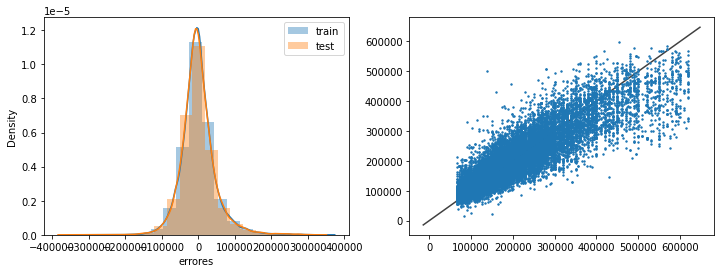

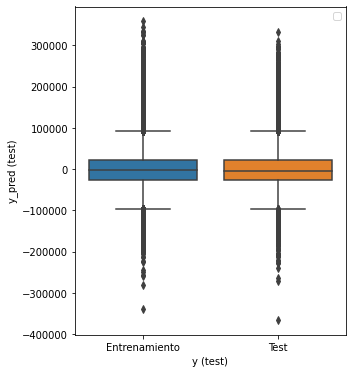

<Figure size 1440x576 with 0 Axes>

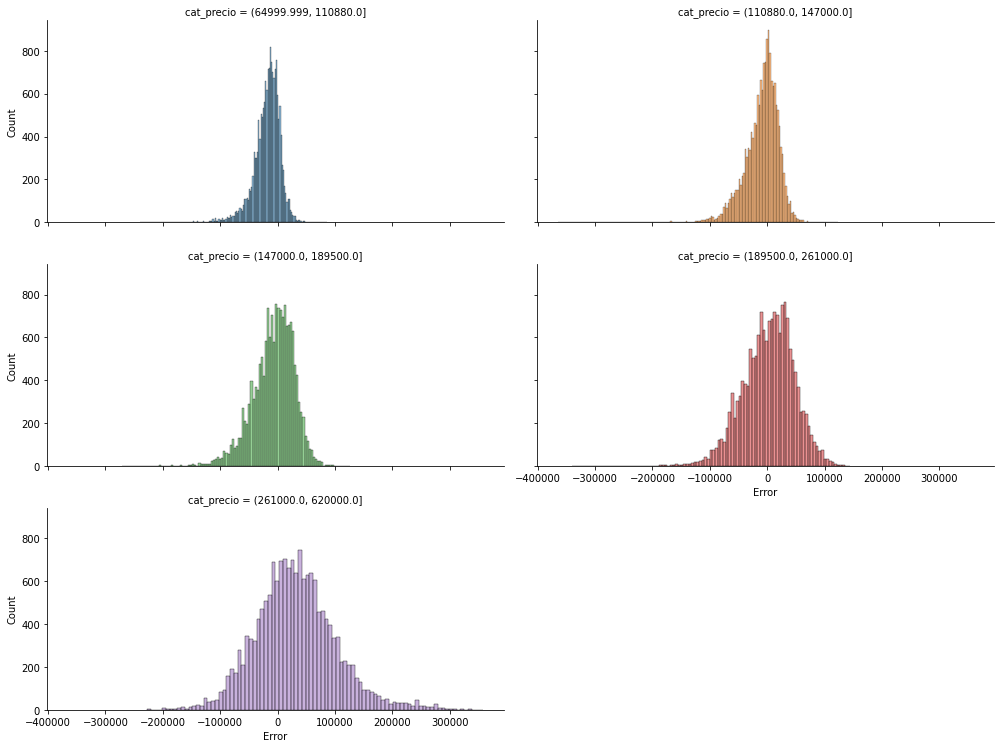

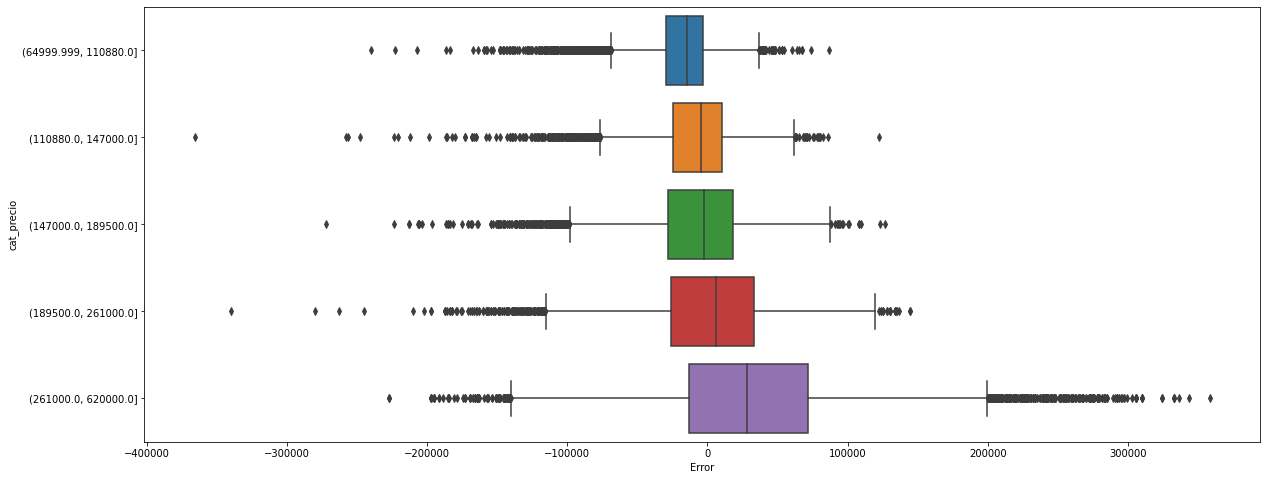

In [338]:
model_ev(X_train_new,X_test_new,y_train,y_test, modelLasso)

In [ ]:
eval_model_CV(modelLasso,"Lineal, PF -Lasso", X_train, y_train,5)

In [ ]:
eval_model_CV(modelLasso,"Lineal, PF -Lasso", X_test, y_test,5)

#### 2.3 RandomForest
##### Sin Optimización

In [80]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

El modelo arrojo un buen resultado en Test y Train, sin embargo la mejora sugiere que existe overfitting por las diferencias entre las metricas en Train y Test. 

RMSE Train: 39409.08794220259

RMSE Test: 42233.46688123797

MAE Train: 27383.40144910634

MAE Test: 28903.747471344792

R^2(train)= 0.8498779342739093
R^2_ajt(train)= 0.8498510804072837

R^2(test)= 0.8291173427661529
R^2_ajt(test)= 0.8290867752405611



/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


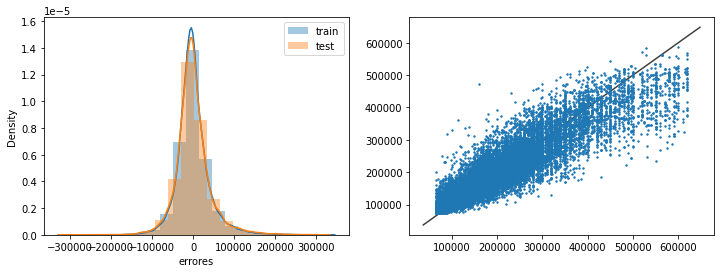

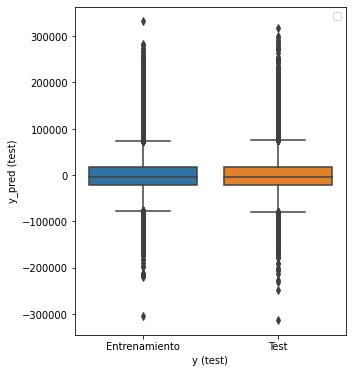

<Figure size 1440x576 with 0 Axes>

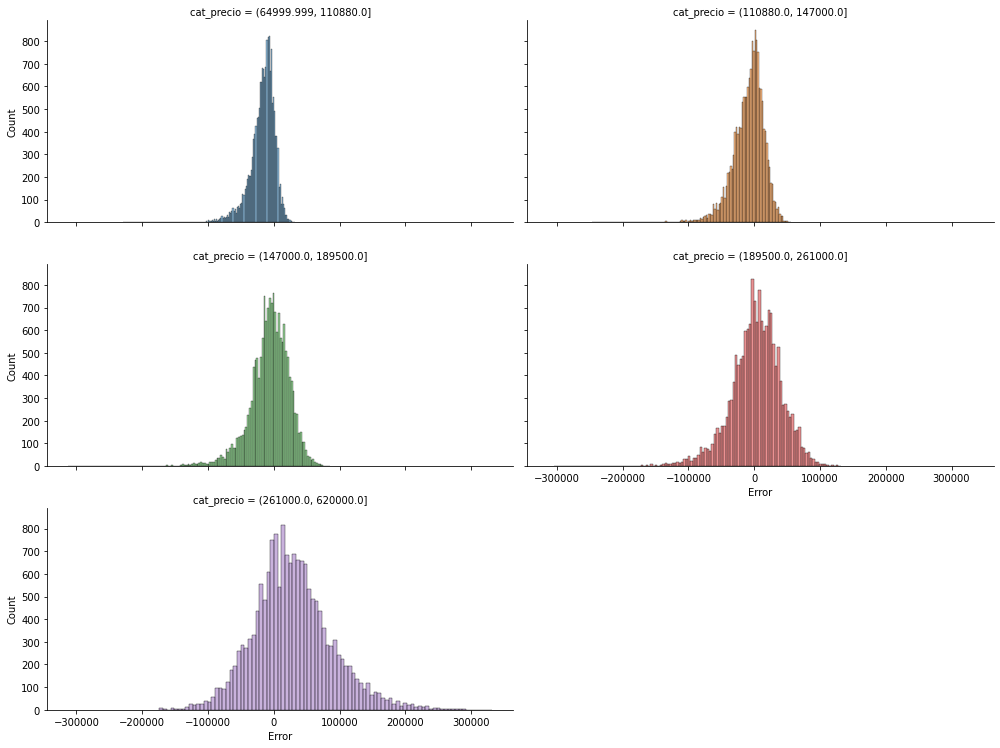

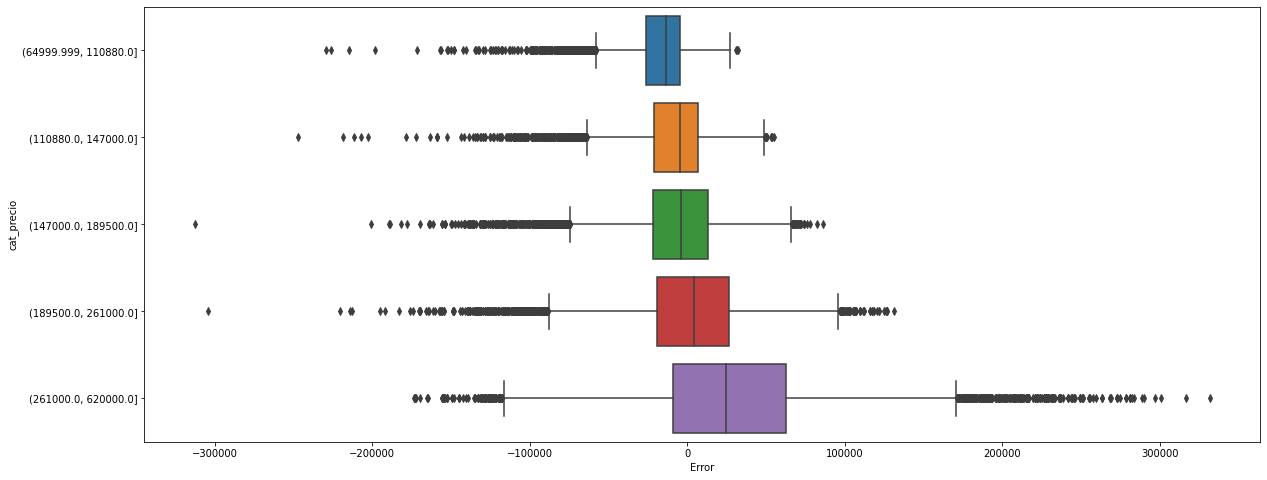

In [331]:
model_ev(X_train,X_test,y_train,y_test, rf)

In [316]:
eval_model_CV(rf,"RandomForest, sin optimizar", X_train, y_train,5)

RMSE TEST:  42165.13175087549 RMSE TRAIN:  39127.14998910219


In [332]:
eval_model_CV(rf,"RandomForest, sin optimizar", X_train, y_train,5)

RMSE TEST:  42214.33555204245 RMSE TRAIN:  39174.45025080332


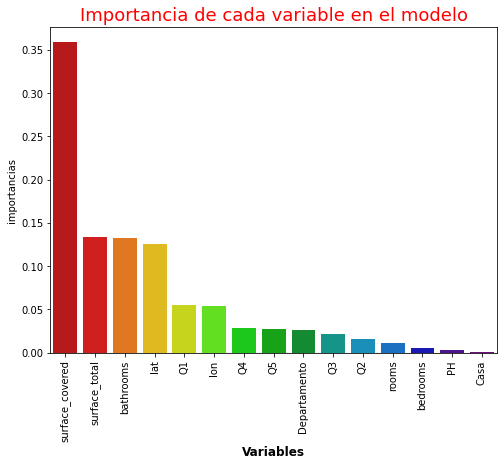

In [208]:
plt.figure(figsize = (8, 6))
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": rf.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= "nipy_spectral_r")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

##### Con Optimización HP - Grid Search

In [84]:
n_estimators = [100, 150]
max_features = np.arange(5,15)
max_depth = np.arange(5,15)


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               }
print(random_grid)

{'n_estimators': [100, 150], 'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}


In [85]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42,
                               scoring    = 'neg_root_mean_squared_error',
                               return_train_score = True,
                               n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....max_depth=6, max_features=10, n_estimators=100; total time=  11.9s
[CV] END .....max_depth=6, max_features=10, n_estimators=100; total time=  12.1s
[CV] END .....max_depth=5, max_features=12, n_estimators=150; total time=  18.0s
[CV] END .....max_depth=5, max_features=12, n_estimators=150; total time=  18.1s
[CV] END .....max_depth=5, max_features=12, n_estimators=150; total time=  18.1s
[CV] END .....max_depth=6, max_features=10, n_estimators=100; total time=  12.3s
[CV] END .....max_depth=9, max_features=12, n_estimators=150; total time=  28.3s
[CV] END .....max_depth=9, max_features=12, n_estimators=150; total time=  28.5s
[CV] END .....max_depth=9, max_features=12, n_estimators=150; total time=  28.6s
[CV] END .....max_depth=11, max_features=9, n_estimators=100; total time=  16.5s
[CV] END ....max_depth=12, max_features=14, n_estimators=100; total time=  25.9s
[CV] END .....max_depth=11, max_features=9, n_es

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': [100, 150]},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=2)

In [86]:
rf_random.best_params_

{'n_estimators': 100, 'max_features': 10, 'max_depth': 13}

In [87]:
resultados = pd.DataFrame(rf_random.cv_results_)
resultados["RMSE_Train-RMSE_Test"] = resultados["mean_train_score"] - resultados["mean_test_score"]
resultados.sort_values('RMSE_Train-RMSE_Test', ascending = True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,RMSE_Train-RMSE_Test
1,17.741204,0.057478,0.328648,0.005310,150,12,5,"{'n_estimators': 150, 'max_features': 12, 'max...",-53535.167965,-53295.191096,-53007.223578,-53279.194213,215.829013,10,-53208.559487,-52868.519980,-52853.478137,-52976.852535,163.956596,302.341678
2,11.786701,0.249296,0.340288,0.074675,100,10,6,"{'n_estimators': 100, 'max_features': 10, 'max...",-50317.542957,-50368.183445,-50047.713719,-50244.480040,140.662371,9,-49838.594340,-49598.517017,-49710.315246,-49715.808868,98.088107,528.671172
9,9.287972,0.149095,0.302152,0.010886,150,7,7,"{'n_estimators': 150, 'max_features': 7, 'max_...",-48216.668684,-48462.729907,-48084.717293,-48254.705294,156.649230,8,-47596.872035,-47367.593203,-47515.607110,-47493.357449,94.915686,761.347845
6,14.682883,0.136120,0.391185,0.004093,150,9,8,"{'n_estimators': 150, 'max_features': 9, 'max_...",-46183.387500,-46362.115941,-45992.431299,-46179.311580,150.950640,7,-44934.609461,-44680.817086,-44784.190119,-44799.872222,104.202011,1379.439358
0,27.993871,0.071755,0.471277,0.018150,150,12,9,"{'n_estimators': 150, 'max_features': 12, 'max...",-44248.186745,-44443.472660,-44092.574335,-44261.411246,143.558523,6,-41998.203804,-41854.101864,-41926.265977,-41926.190549,58.829395,2335.220698
5,24.144248,0.936288,0.495715,0.013395,150,12,10,"{'n_estimators': 150, 'max_features': 12, 'max...",-42267.749536,-42284.198209,-42060.435639,-42204.127795,101.827359,5,-38745.651601,-38610.790854,-38716.237841,-38690.893432,57.899969,3513.234363
4,15.384536,0.415548,0.444066,0.057864,100,9,11,"{'n_estimators': 100, 'max_features': 9, 'max_...",-40466.410436,-40521.852044,-40179.243817,-40389.168766,150.155044,4,-35754.928723,-35597.336855,-35624.123505,-35658.796361,68.849858,4730.372405
3,24.636461,0.591408,0.487585,0.030896,100,14,12,"{'n_estimators': 100, 'max_features': 14, 'max...",-38994.590479,-38844.465586,-38481.701528,-38773.585864,215.300906,3,-31770.598967,-31822.325270,-31799.714562,-31797.546266,21.172761,6976.039598
7,14.863075,0.728489,0.472134,0.021018,100,10,13,"{'n_estimators': 100, 'max_features': 10, 'max...",-37263.632662,-37199.232582,-36805.651072,-37089.505439,202.429936,1,-28552.170144,-28603.981195,-28554.466999,-28570.206112,23.900991,8519.299327
8,15.224813,0.453616,0.299114,0.013713,100,12,13,"{'n_estimators': 100, 'max_features': 12, 'max...",-37157.976465,-37384.084867,-36769.061851,-37103.707728,253.997571,2,-28104.053379,-28683.224690,-28313.491272,-28366.923114,239.445294,8736.784614


In [88]:
resultados.filter(regex = '(param.*|mean_t|std_t|RMSE)') \
    .drop(columns = 'params') \
    .sort_values(['mean_test_score', "RMSE_Train-RMSE_Test"], ascending = False) \
    .head(10)

,param_n_estimators,param_max_features,param_max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score,RMSE_Train-RMSE_Test
7,100,10,13,-37089.505439,202.429936,-28570.206112,23.900991,8519.299327
8,100,12,13,-37103.707728,253.997571,-28366.923114,239.445294,8736.784614
3,100,14,12,-38773.585864,215.300906,-31797.546266,21.172761,6976.039598
4,100,9,11,-40389.168766,150.155044,-35658.796361,68.849858,4730.372405
5,150,12,10,-42204.127795,101.827359,-38690.893432,57.899969,3513.234363
0,150,12,9,-44261.411246,143.558523,-41926.190549,58.829395,2335.220698
6,150,9,8,-46179.311580,150.950640,-44799.872222,104.202011,1379.439358
9,150,7,7,-48254.705294,156.649230,-47493.357449,94.915686,761.347845
2,100,10,6,-50244.480040,140.662371,-49715.808868,98.088107,528.671172
1,150,12,5,-53279.194213,215.829013,-52976.852535,163.956596,302.341678


In [89]:
resultados.filter(regex = '(param.*|mean_t|RMSE)') \
    .drop(columns = 'params') \
    .sort_values(['mean_test_score', "RMSE_Train-RMSE_Test"], ascending = False) \
    .head(10)

,param_n_estimators,param_max_features,param_max_depth,mean_test_score,mean_train_score,RMSE_Train-RMSE_Test
7,100,10,13,-37089.505439,-28570.206112,8519.299327
8,100,12,13,-37103.707728,-28366.923114,8736.784614
3,100,14,12,-38773.585864,-31797.546266,6976.039598
4,100,9,11,-40389.168766,-35658.796361,4730.372405
5,150,12,10,-42204.127795,-38690.893432,3513.234363
0,150,12,9,-44261.411246,-41926.190549,2335.220698
6,150,9,8,-46179.311580,-44799.872222,1379.439358
9,150,7,7,-48254.705294,-47493.357449,761.347845
2,100,10,6,-50244.480040,-49715.808868,528.671172
1,150,12,5,-53279.194213,-52976.852535,302.341678


De acuerdo a la tabla anterior se elige como mejor modelo aquel que no presenta tantas diferencias entre train y test en la metrica y que a la vez presenta un bien RMSE.

In [90]:
rf_op = RandomForestRegressor(n_estimators=150,
                           max_depth=10,
                           max_features=9)
rf_op.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=9, n_estimators=150)

RMSE Train: 39462.96146639002

RMSE Test: 42216.67146410634

MAE Train: 27423.76064611271

MAE Test: 28903.682167343155

R^2(train)= 0.8494672100895713
R^2_ajt(train)= 0.8494402827525174

R^2(test)= 0.8292532290686742
R^2_ajt(test)= 0.8292226858504526



/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


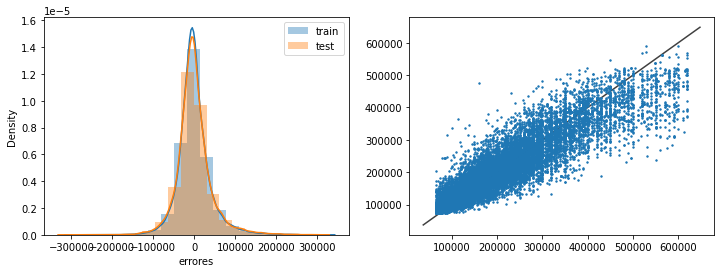

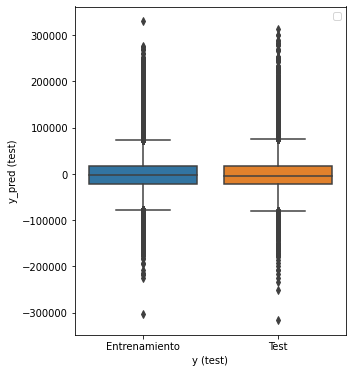

<Figure size 1440x576 with 0 Axes>

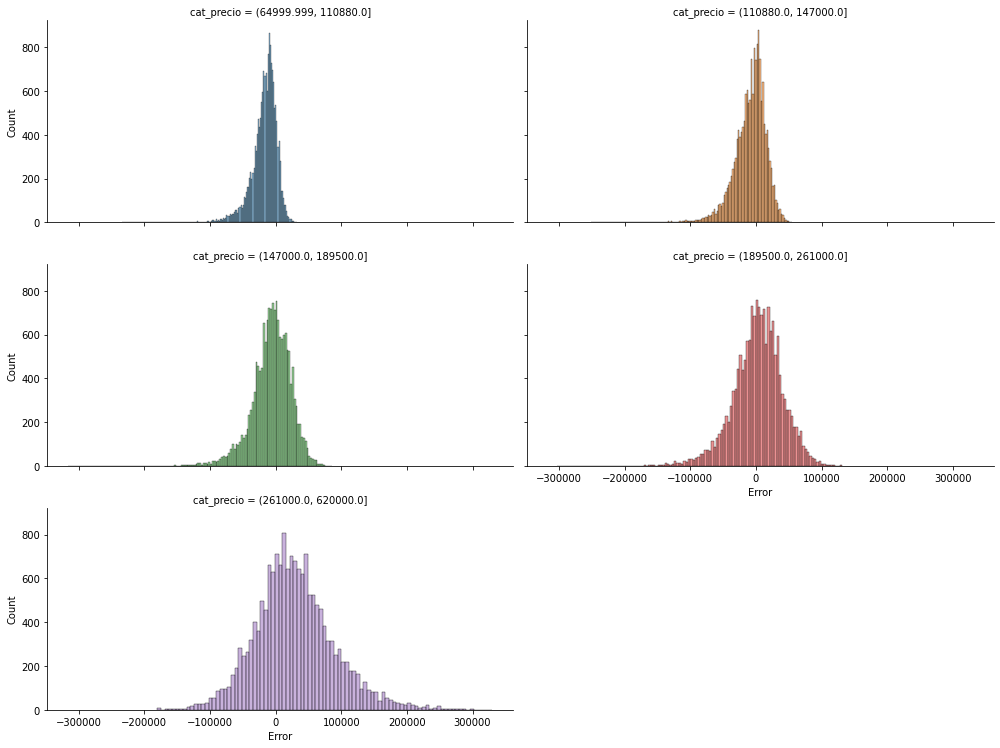

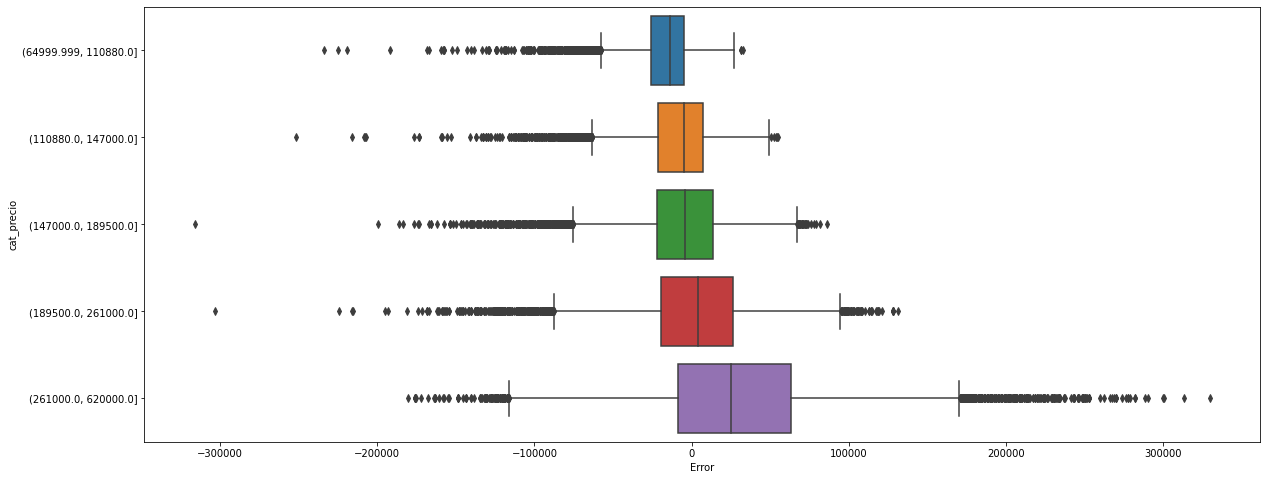

In [333]:
model_ev(X_train,X_test,y_train,y_test,rf_op)

In [210]:
eval_model_CV(rf_op,"RandomForest, optimizado", X_train, y_train,5)

RMSE TEST:  42172.201418278826 RMSE TRAIN:  39165.273801073694


In [211]:
eval_model_CV(rf_op,"RandomForest, optimizado", X_test, y_test,5)

RMSE TEST:  43256.2439568095 RMSE TRAIN:  37483.955888772995


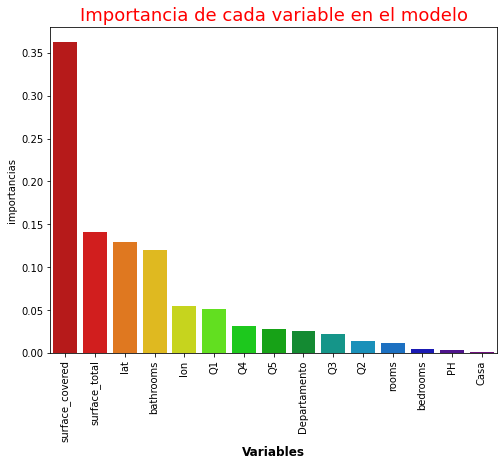

In [212]:
plt.figure(figsize = (8, 6))
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": rf_op.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= "nipy_spectral_r")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

#### 2.4 XBOOST
##### Sin Optimización

In [147]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
ensemble.fit(X_train, y_train)
results = cross_validate(ensemble,X,y, cv=5, scoring = 'neg_root_mean_squared_error',return_train_score= True )

In [116]:
def eval_model_CV (model, descr, X_, y_, folds): 
    resultado = cross_validate(model,
                               X_,
                               y_, 
                               cv=folds, 
                               scoring = 'neg_root_mean_squared_error',
                               return_train_score= True 
                               ) 
    rmse_test = np.mean(resultado['test_score']*-1)
    rmse_train = np.mean(resultado['train_score']*-1)
    return print('RMSE TEST: ',rmse_test, 'RMSE TRAIN: ', rmse_train)

In [117]:
eval_model_CV(ensemble, 'GBR, sin OP', X_train, y_train, 5)

RMSE TEST:  46880.59047642174 RMSE TRAIN:  46372.81734866645


In [122]:
eval_model_CV(ensemble, 'GBR, sin OP', X_test, y_test, 5)

RMSE TEST:  47805.34963630432 RMSE TRAIN:  46301.66533565573


RMSE Train: 46507.66585958889

RMSE Test: 47281.154470974056

MAE Train: 32770.349044876995

MAE Test: 32996.10921731836

R^2(train)= 0.7909256039059233
R^2_ajt(train)= 0.7908882046340682

R^2(test)= 0.7858289991272478
R^2_ajt(test)= 0.7857906881736602



/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


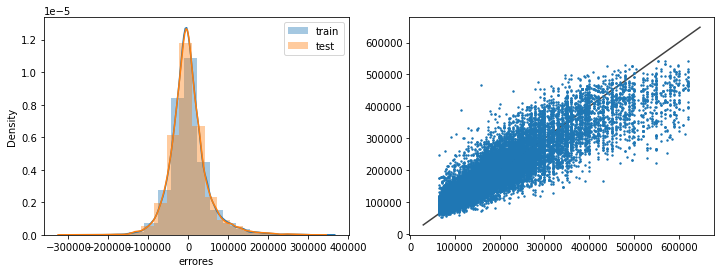

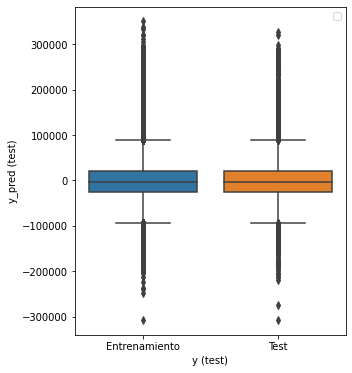

<Figure size 1440x576 with 0 Axes>

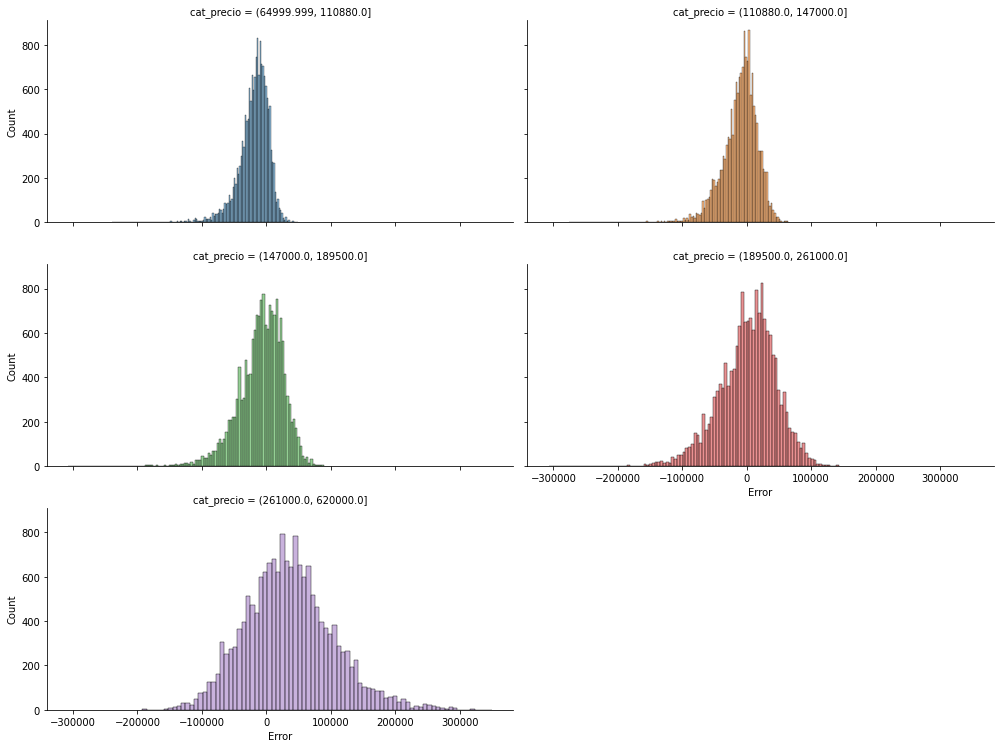

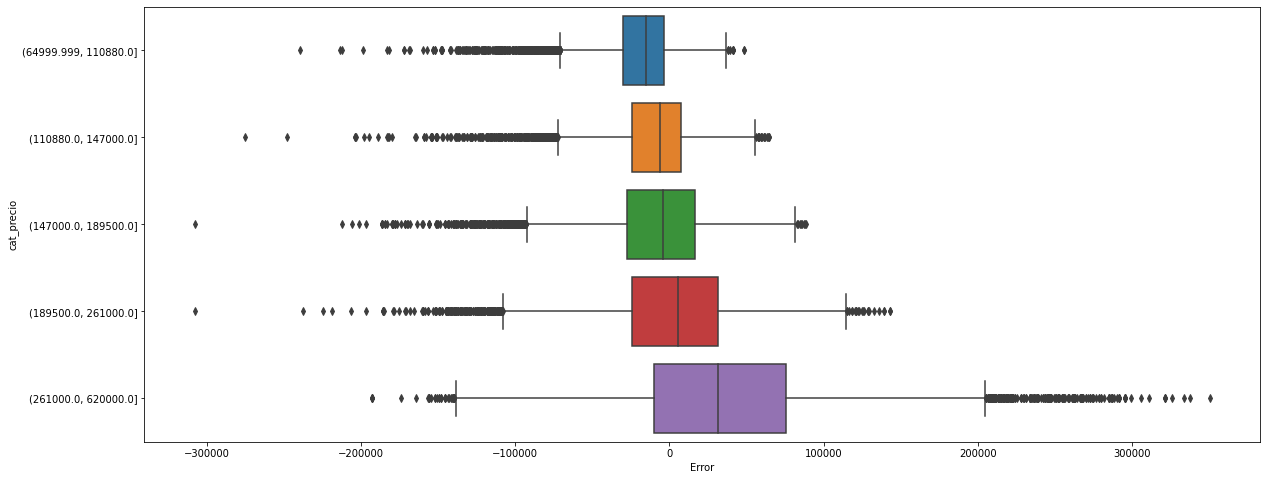

In [334]:
model_ev(X_train,X_test,y_train,y_test, ensemble)

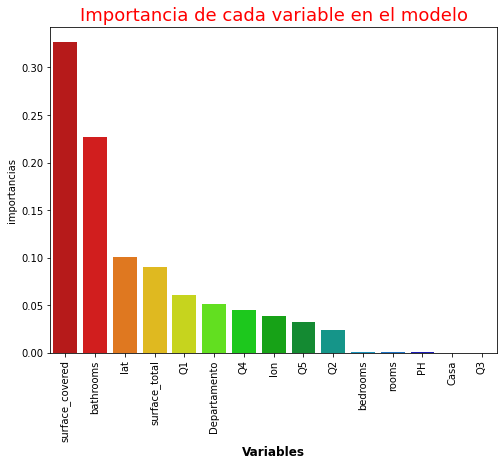

In [150]:
plt.figure(figsize = (8, 6))
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": ensemble.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= "nipy_spectral_r")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

##### Con Optimización de HP

Solo vamos a probar distinto numero de estimadores

In [125]:
list(range(20,501,40))

[20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]

In [127]:
param_test1 = {'n_estimators':range(20,501,40)}
GB_estimator = GradientBoostingRegressor(learning_rate=0.1, 
                                       min_samples_split=500,
                                       min_samples_leaf=50,
                                       max_depth=8,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)
GB_gsearch1 = GridSearchCV(GB_estimator, 
                        param_grid = param_test1, 
                        #scoring='r2', 
                        scoring = 'neg_root_mean_squared_error',
                        cv=5)

In [128]:
GB_gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'n_estimators': range(20, 501, 40)},
             scoring='neg_root_mean_squared_error')

In [133]:
GB_gsearch1.best_params_, GB_gsearch1.best_score_

({'n_estimators': 500}, -38619.07396336855)

In [134]:
GB_gsearch1.best_estimator_

GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                          min_samples_split=500, n_estimators=500,
                          random_state=10, subsample=0.8)

RMSE Train: 34770.64527513353

RMSE Test: 38696.00258724751

MAE Train: 23865.86695531765

MAE Test: 26115.86737729136

R^2(train)= 0.8831369370897449
R^2_ajt(train)= 0.8831160326005236

R^2(test)= 0.8565446568640662
R^2_ajt(test)= 0.8565189955421768



/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ctalamilla/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


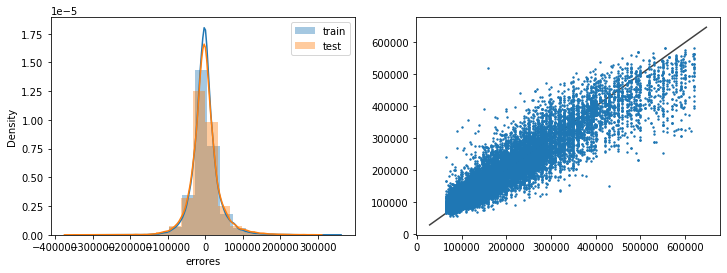

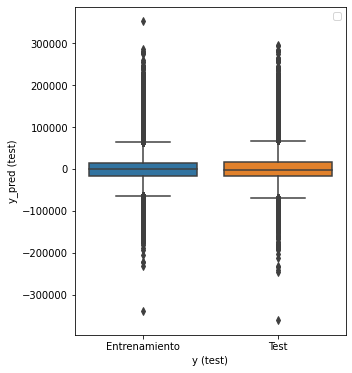

<Figure size 1440x576 with 0 Axes>

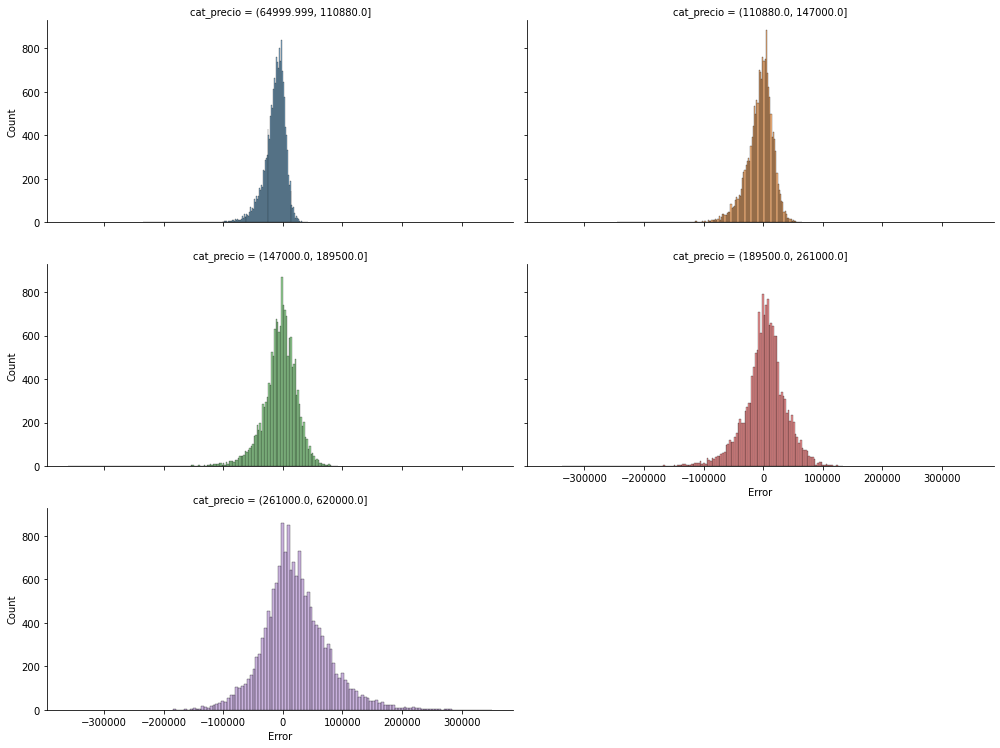

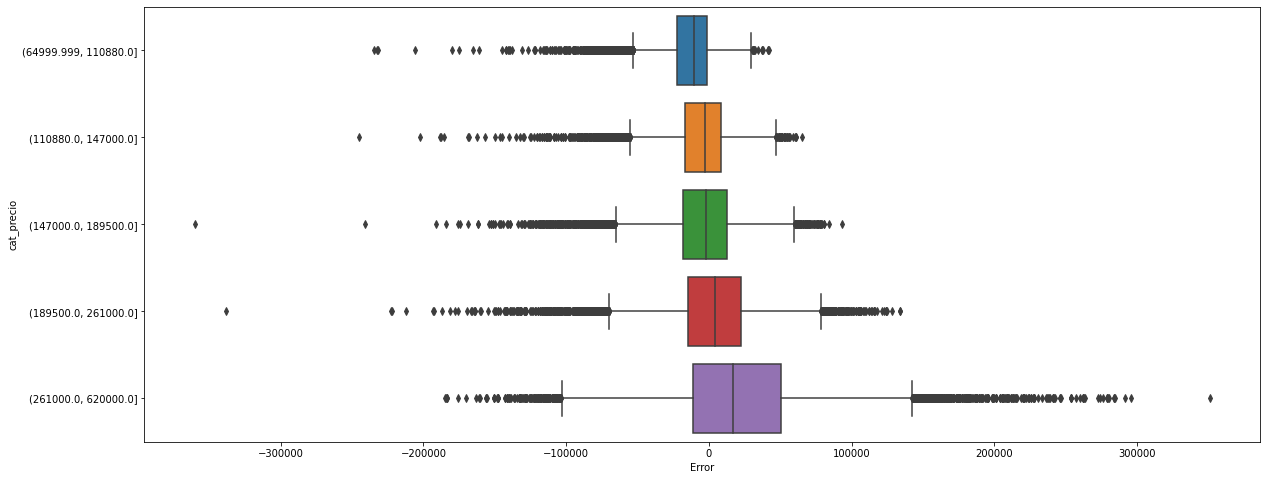

In [335]:
model_ev(X_train,X_test,y_train,y_test, GB_gsearch1.best_estimator_)

In [139]:
eval_model_CV(GB_gsearch1.best_estimator_,"GB, optimizado",  X_train, y_train, 5)

RMSE TEST:  38619.07396336855 RMSE TRAIN:  34985.79542051439


In [140]:
eval_model_CV(GB_gsearch1.best_estimator_, "GB, optimizado", X_test, y_test, 5)

RMSE TEST:  42025.4296638578 RMSE TRAIN:  35998.907061561


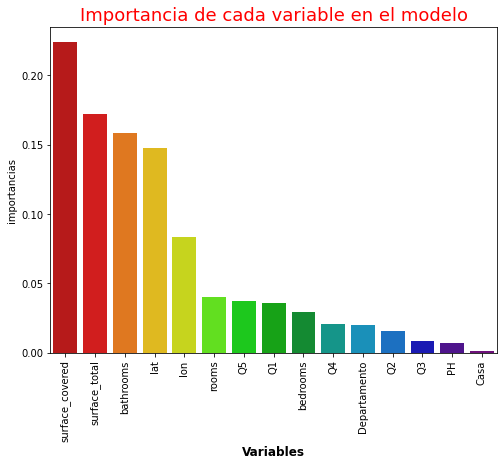

In [145]:
plt.figure(figsize = (8, 6))
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": GB_gsearch1.best_estimator_.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= "nipy_spectral_r")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

**Criterios de aceptación**

En los Modelos Avanzados debes hacer un train/test split y usar Validación Cruzada.
**Realizado**

Al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando).
**Realizado** **Se hicieron todos por randomsearch.**

En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.
**Realizado**

### 3 Evalucion de modelos

7. Interpretación de modelos
   1. Que variables fueron relevantes para hacer el modelo para hacer predicciones?
   2. Cuales variables no fueron relevantes?
   3. En caso de Regresión Lineal con regularización, prestar atención a los parámetros (pendientes) obtenidos.
   4. En caso de Ensamble de Árboles, además de ver la importancia de cada atributo, también elige algunos arboles al azar y observa qué atributos considera importantes. 
      1. En que se diferencian estos arboles?
      2. Por que las diferencias?
      3. coincide con lo que esperabas a partir de tu experiencia con este dataset?
   5. **13 puntos**
8. Interpretación de los modelos
    1. Como es la distribución de los errores?
    2. Donde fallan los modelos?
    3. A que crees que se debe?
    4. **8 puntos**


**Criterios de aceptación**

Debes responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu sprint project!

Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?

#### 3.1 Que variables fueron mas relevantes para hacer el modelo:
Como se puede observar, las columnas con mayor importancia en los modelos ejecutados fueron:
1) Superficie Cubierta
2) Latitud
3) Número de baños

Las variables creadas Q1 a Q5 se comportaron de buena manera y ayudaron a los regresores, incluso mejor que otras columnas como tipo de propiedad.


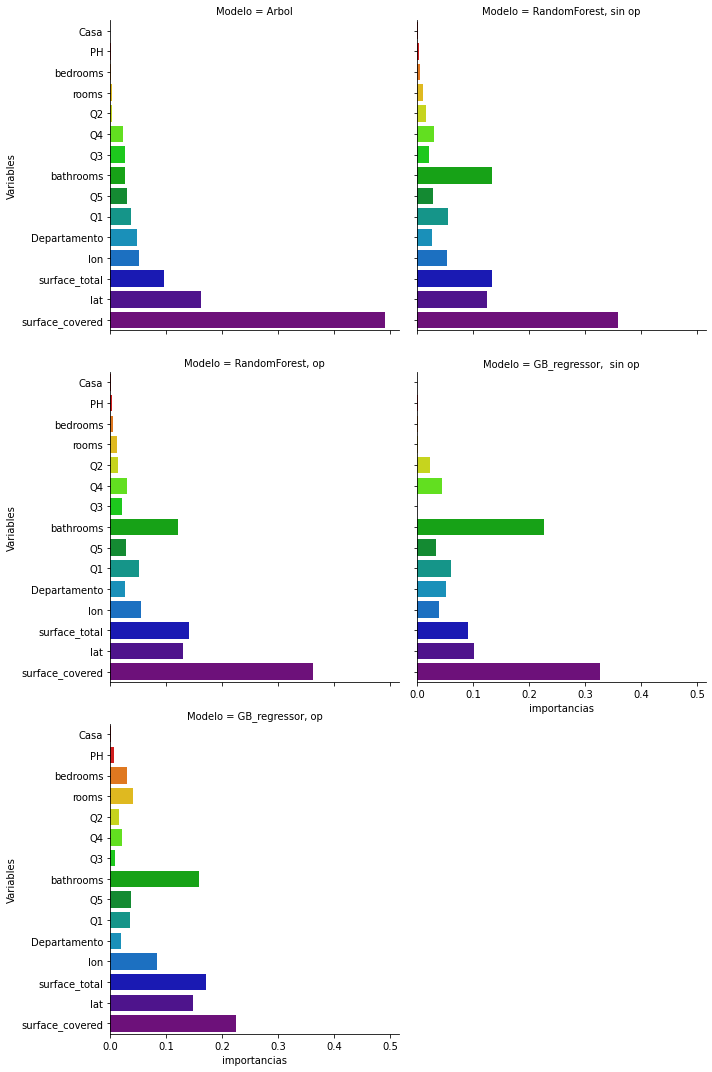

In [231]:
sns.catplot(data = pd.concat([
                pd.DataFrame({
                'Modelo': 'Arbol',
                "Variables": X.columns,
                "importancias": tree.feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'RandomForest, sin op',
                    "Variables": X.columns,
                    "importancias": rf.feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'RandomForest, op',
                    "Variables": X.columns,
                    "importancias": rf_op.feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'GB_regressor,  sin op',
                    "Variables": X.columns,
                    "importancias": ensemble.feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'GB_regressor, op',
                    "Variables": X.columns,
                    "importancias": GB_gsearch1.best_estimator_.feature_importances_}).sort_values("importancias", ascending= True)
                ]),
            y= 'Variables',
            x= 'importancias',
            kind= 'bar',
            col= 'Modelo',
            col_wrap=2, 
            palette= "nipy_spectral_r")        



#### 3.2 Que variables fueron mas relevantes para hacer el modelo:
Las variables que no representaron buena importancia a los modelos fueron:
1) Casa
2) PH
3) Número de habitaciones

#### 3.3 En caso de Regresión Lineal con regularización, prestar atención a los parámetros (pendientes) obtenidos.
Los coeficientes poseen diferentes magnitudes y direcciones de las pendientes (positivas y negativas), en el caso de Ridge muchos de ellos tendieron a 0 para lograr la regularización.
Debido a la cantidad de columnas del dataset X (15) y al grado elegido para los polinomios (3) la cantidad de columnas obtenidas fue de 815, un número dificil de manejar y analizar en detalle.

In [246]:
pd.DataFrame(rf_op.estimators_).sample(4)

,0
119,"DecisionTreeRegressor(max_depth=10, max_featur..."
39,"DecisionTreeRegressor(max_depth=10, max_featur..."
115,"DecisionTreeRegressor(max_depth=10, max_featur..."
66,"DecisionTreeRegressor(max_depth=10, max_featur..."


#### 3.4 En caso de Ensamble de Árboles, además de ver la importancia de cada atributo, también elige algunos arboles al azar y observa qué atributos considera importantes. 
      1. En que se diferencian estos arboles?


   Se diferencian en las importancias de cada variable, el metodo al ser un metodo de ensable genera numerosos arboles y luego por putuacion o voto elige los mejores resultados. Es decir los arboles individuales siempre responderan de manera diferente, por que los inputs son tomados al azar y con reposición.


      1. Por que las diferencias?


ver respyesta anterior.


      1. coincide con lo que esperabas a partir de tu experiencia con este dataset?



Si, esperaba que el modelo ajuste en general como ajustaba el arbol inicial.

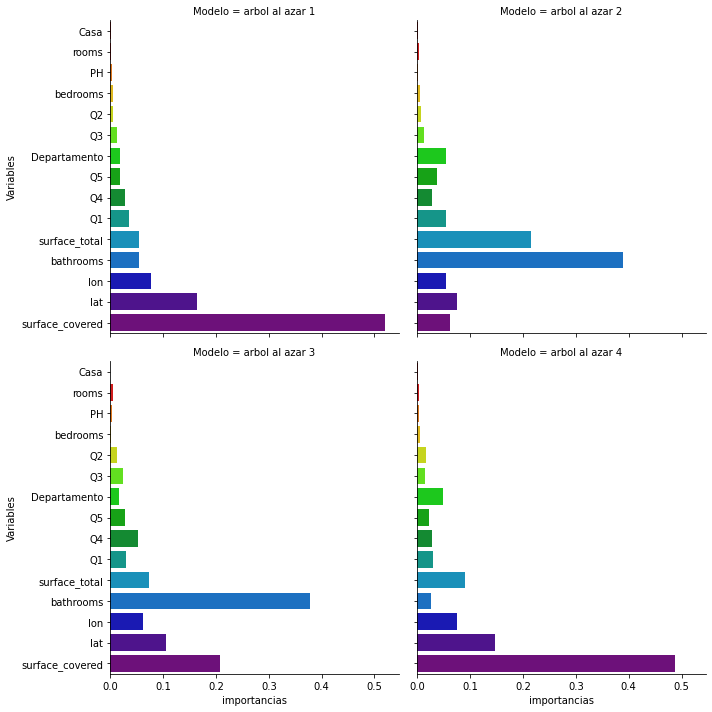

In [252]:
sns.catplot(data = pd.concat([
                pd.DataFrame({
                'Modelo': 'arbol al azar 1',
                "Variables": X.columns,
                "importancias": rf_op.estimators_[pd.DataFrame(rf_op.estimators_).sample(4).index[0]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'arbol al azar 2',
                    "Variables": X.columns,
                    "importancias": rf_op.estimators_[pd.DataFrame(rf_op.estimators_).sample(4).index[1]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'arbol al azar 3',
                    "Variables": X.columns,
                    "importancias": rf_op.estimators_[pd.DataFrame(rf_op.estimators_).sample(4).index[2]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'arbol al azar 4',
                    "Variables": X.columns,
                    "importancias": rf_op.estimators_[pd.DataFrame(rf_op.estimators_).sample(4).index[3]].feature_importances_}).sort_values("importancias", ascending= True)
                ]),
            y= 'Variables',
            x= 'importancias',
            kind= 'bar',
            col= 'Modelo',
            col_wrap=2, 
            palette= "nipy_spectral_r")   

#### 3.4 Interpretación de los modelos
    1. Como es la distribución de los errores?

La distribución de los errores se presento en los analisis particulares, a partir de un distplot, y un boxplot. En todos los modelos la distribución es Normal, con excepción del RandomForest sin Optimizar, que presenta leve asimetria. Además este modelo (RF sin optimizar), presentó la menor dispersión, pero presentó mucha varianza entre test y train.

    2. Donde fallan los modelos?

Los modelos fallan sobre todo con aquellos y (precio) que son elevados, o muy chicos.

    3. A que crees que se debe?

La metrica de evaluación elegida es el RMSE el cual es sensible a los outliers, en presencia de valores cercanos a 600K de precio la diferencia entre el Precio y el precio predicho puede elevarse (residuo) y al estar la metrica elevada al cuadrado es posible que se eleve el valor.

    4. **8 puntos**

#### 4 Cierre - Conclusiones

Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Ten en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas.

La metodologia demostro ser buena, ya que con un poco de trabajo de procesamiento se logró mejorar mucho la metrica.
Que mejoraria? intentaría hacer que el modelo ajuste mejor con los outliers de precio, o con precios mayores a los 600K UDS.

Comenzamos trabajando con un modelo sencillo, y luego pasamos a trabajar con modelos avanzados, y a optimizar hiperparametros con GridSearch y evaluacion por CV. 

La metrica respondió de manera acertada, mejorando desde el Arbol inicial hasta el GBoostRegressor optimizado. El modelo elejido fue el este ultimo con las siguientes metricas:
Evaluacion sin CV:
    1)RMSE Train: 34663.27997520079

    2)RMSE Test: 38437.759745951735
    
Evaluación con CV solo con los datos de TEST
RMSE TEST:  42025.4296638578 

Creo que este valor puede llegar a ser mejorable, pero la propia distribución de los datos quizas no permita elevar la mejora demasiado. 